In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from funcs import addMeanAndStdDev
from funcs_plotter import scatterplotWithErrors, scatterplotColored
import numpy as np

# Oct 2023

## correlation kernel

In [ ]:
fiveColors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

file size =  20


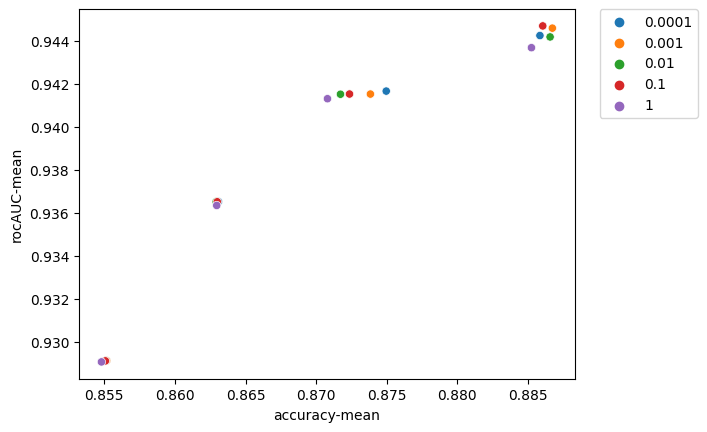

In [16]:
df_pearson = pd.read_csv("hyperParamOpt/jobsOutput/withoutTtype/minOfK5/quantumKernel/Oct2023/pearson/hyperParOptResults2.csv", index_col=0)
df_pearson = addMeanAndStdDev(df_pearson, classical=False)
print('file size = ', len(df_pearson))
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="alphaCorr", data=df_pearson, palette=fiveColors, legendOutsideGraph=True)

In [41]:
df_pearson[df_pearson['rocAUC-mean']>0.943].iloc[:,22:24]

,rocAUC-mean,rocAUC-std
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.0001')",0.944248,0.005779
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.001')",0.944593,0.005985
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.01')",0.944184,0.006340
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.1')",0.944696,0.004964
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '1')",0.943684,0.006569


file size =  20


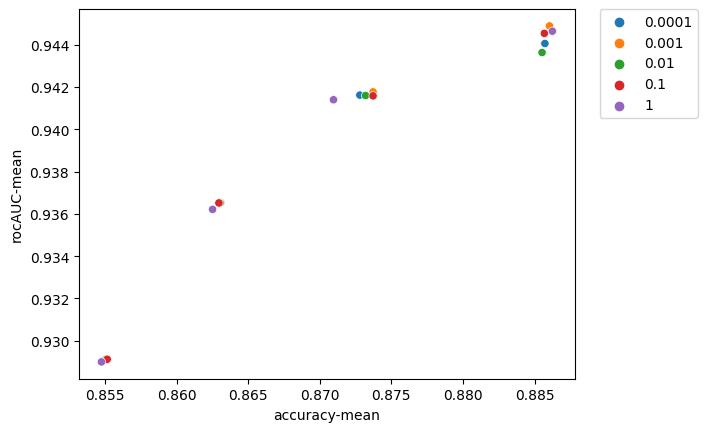

In [17]:
df_spearman = pd.read_csv("hyperParamOpt/jobsOutput/withoutTtype/minOfK5/quantumKernel/Oct2023/spearman/hyperParOptResults2.csv", index_col=0)
df_spearman = addMeanAndStdDev(df_spearman, classical=False)
print('file size = ', len(df_spearman))
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="alphaCorr", data=df_spearman, palette=fiveColors, legendOutsideGraph=True)


In [40]:
df_spearman[df_spearman['rocAUC-mean']>0.943].iloc[:,22:24]

,rocAUC-mean,rocAUC-std
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.0001')",0.944055,0.006453
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.001')",0.944886,0.006052
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.01')",0.943630,0.006120
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.1')",0.944535,0.006079
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '1')",0.944638,0.005355


file size =  20


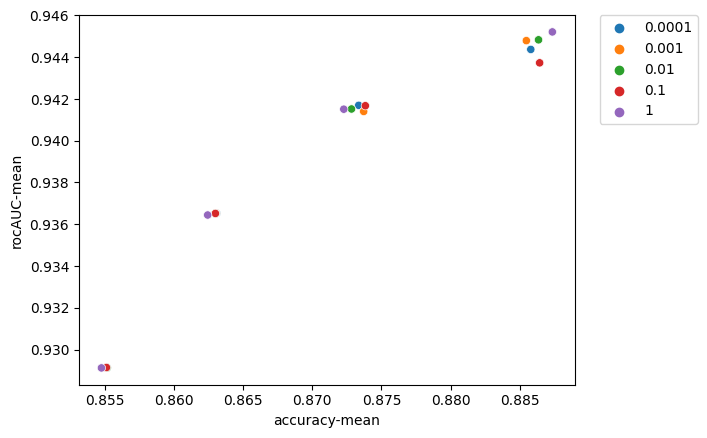

In [18]:
df_kendall = pd.read_csv("hyperParamOpt/jobsOutput/withoutTtype/minOfK5/quantumKernel/Oct2023/kendall/hyperParOptResults2.csv", index_col=0)
df_kendall = addMeanAndStdDev(df_kendall, classical=False)
print('file size = ', len(df_kendall))
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="alphaCorr", data=df_kendall, palette=fiveColors, legendOutsideGraph=True)


In [39]:
df_kendall[df_kendall['rocAUC-mean']>0.943].iloc[:,22:24]

,rocAUC-mean,rocAUC-std
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.0001')",0.944374,0.005286
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.001')",0.944795,0.005641
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.01')",0.944834,0.006528
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '0.1')",0.943731,0.006081
"('0.03', '10000000.0', 'None', 'YandYZ', 'None', '1')",0.945212,0.005557


# before Sep 2023 (without T-TYPE)

## Classical

In [2]:
df = pd.read_csv("hyperParamOpt/jobsOutput/withoutTtype/minOfK5/classicalKernel/RBF/hyperParOptResults2.csv", index_col=0)
df = addMeanAndStdDev(df, classical=True)

In [6]:
df[df.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '100000000.0', '0.1', 'None')",290.917965,NaN,355.306677,213.299470,330.461525,0.896836,NaN,0.935490,0.852746,0.950880,...,0.017680,0.87055,0.031149,0.048239,0.019287,0.035781,RBF,100000000.0,0.1,None
"('RBF', '100000.0', 'auto', 'None')",62.817500,NaN,69.212599,65.720315,69.636792,0.894359,NaN,0.924535,0.820097,0.946568,...,0.021501,0.86810,0.036033,0.061559,0.023501,0.041508,RBF,100000.0,auto,None
"('RBF', '100000000.0', 'scale', 'None')",NaN,NaN,37680.856494,NaN,NaN,NaN,NaN,0.899679,NaN,NaN,...,NaN,0.86720,NaN,NaN,NaN,NaN,RBF,100000000.0,scale,None
"('RBF', '10000000.0', '100', 'None')",NaN,NaN,35002.102644,38663.642112,NaN,NaN,NaN,0.749591,0.832742,NaN,...,0.027530,0.77920,0.038184,0.074316,0.031950,0.049004,RBF,10000000.0,100,None
"('RBF', '1000000.0', '10', 'None')",34230.641972,NaN,NaN,NaN,NaN,0.858521,NaN,NaN,NaN,NaN,...,NaN,0.86840,NaN,NaN,NaN,NaN,RBF,1000000.0,10,None


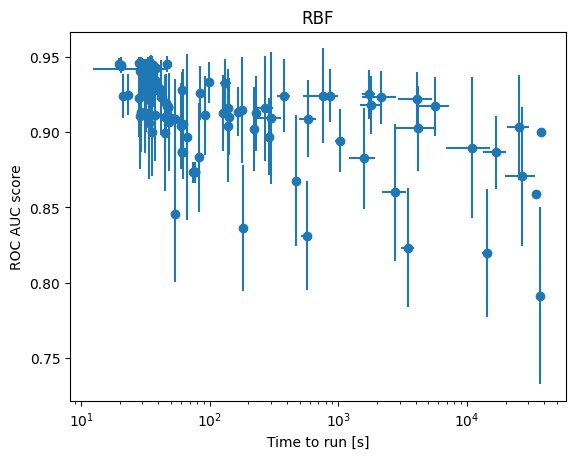

In [4]:
scatterplotWithErrors(x=df['TimeToRun-mean'], y=df["rocAUC-mean"], x_err=df['TimeToRun-std'], y_err=df["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='RBF')


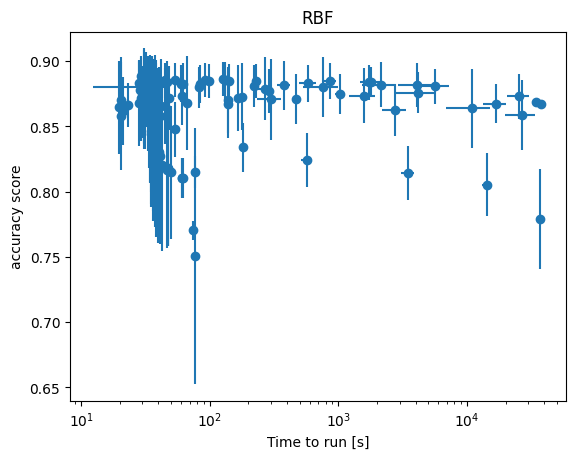

In [7]:
scatterplotWithErrors(x=df['TimeToRun-mean'], y=df["accuracy-mean"], x_err=df['TimeToRun-std'], y_err=df["accuracy-std"], xlabel='Time to run [s]', ylabel='accuracy score', title='RBF')


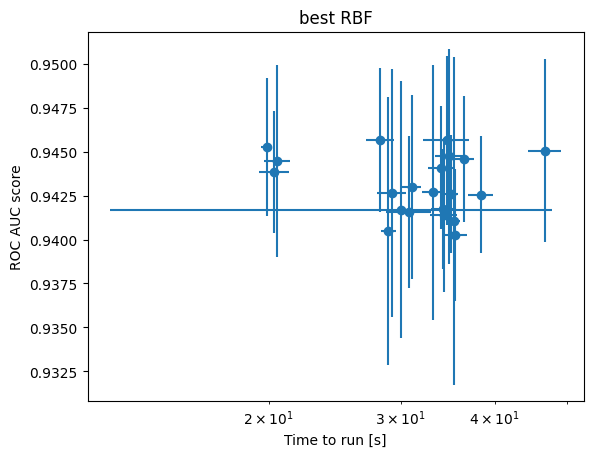

In [8]:
df_highROC = df[df['rocAUC-mean']>0.94]
scatterplotWithErrors(x=df_highROC['TimeToRun-mean'], y=df_highROC["rocAUC-mean"], x_err=df_highROC['TimeToRun-std'], y_err=df_highROC["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='best RBF')


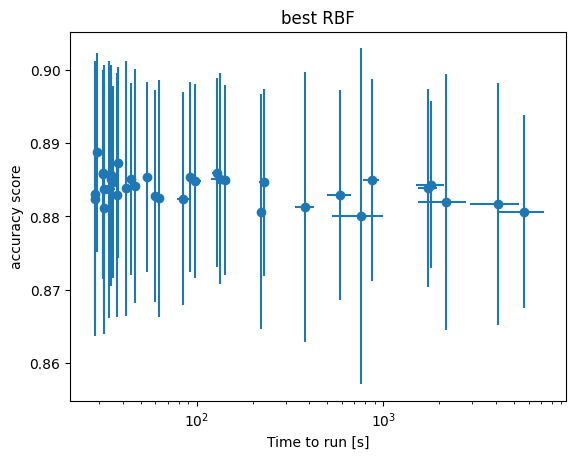

In [10]:
df_highAcc = df[df['accuracy-mean']>0.88]
scatterplotWithErrors(x=df_highAcc['TimeToRun-mean'], y=df_highAcc["accuracy-mean"], x_err=df_highAcc['TimeToRun-std'], y_err=df_highAcc["accuracy-std"], xlabel='Time to run [s]', ylabel='accuracy score', title='best RBF')


In [11]:
seventeenColors = ['#000000', '#FF0000', '#00FF00','#0000FF','#00FFFF','#FF00FF','#FFFF00','#FFA500','#FFC0CB','#808080','#A9A9A9','#D3D3D3','#A52A2A','#800080','#000080','#008080','#FFD700']


In [12]:
decreasingColorDarkness={10000: "#F8D1CC",
1000: "#EEA8A1",
100: "#E47A76",
10: "#DA4B4B",
1: "#CF3333",
0.1: "#C92828"}

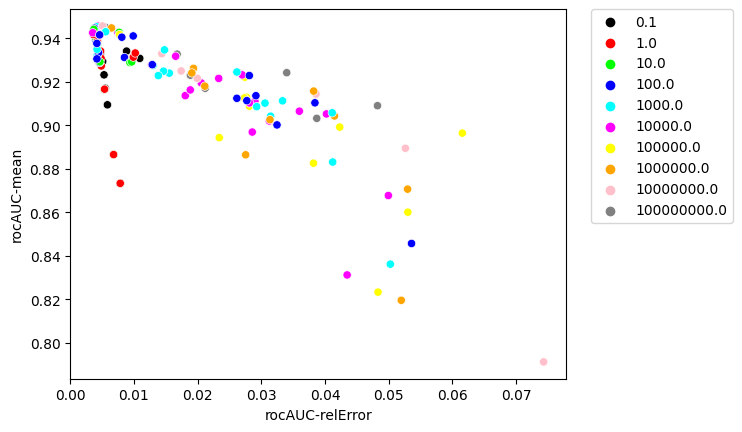

In [13]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df, palette=seventeenColors[:10], legendOutsideGraph=True)


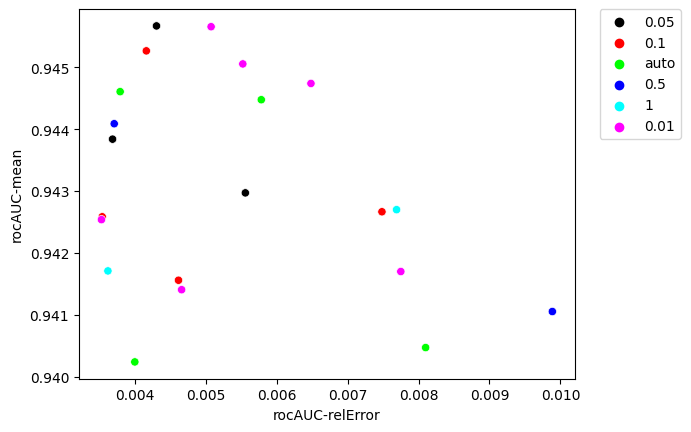

In [14]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df_highROC, palette=seventeenColors[:6], legendOutsideGraph=True)


In [21]:
df[(df['accuracy-mean']>0.88) & (df['rocAUC-mean']>0.940)].iloc[:,-15:]


,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '100000000.0', '0.01', 'None')",46.649034,2.367228,0.945052,0.005219,0.926101,0.008612,0.88412,0.015968,0.005522,0.009300,0.018061,RBF,100000000.0,0.01,None
"('RBF', '10000000.0', '0.01', 'None')",34.533236,2.434931,0.945652,0.004799,0.927085,0.008083,0.88560,0.015112,0.005075,0.008719,0.017064,RBF,10000000.0,0.01,None
"('RBF', '1000000.0', '0.01', 'None')",34.807448,1.497267,0.944737,0.006125,0.926708,0.007975,0.88512,0.014441,0.006483,0.008606,0.016315,RBF,1000000.0,0.01,None


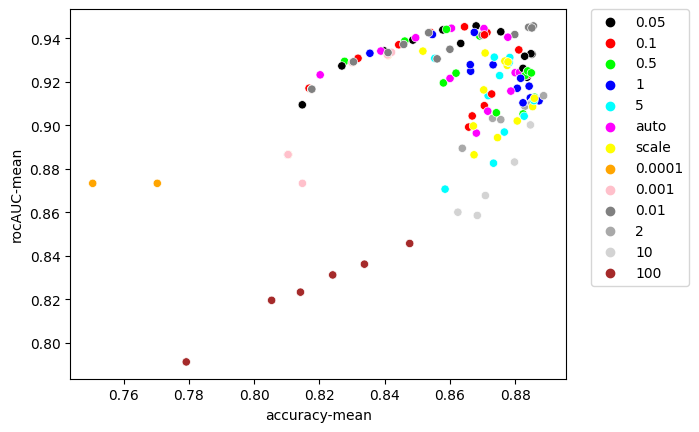

In [16]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="gamma", data=df, palette=seventeenColors[:13], legendOutsideGraph=True)


In [17]:
cmap = plt.cm.get_cmap('viridis')
sixDarknessIncreasingColors = [cmap(i) for i in np.linspace(0, 1, 6)]
cColors = dict(zip(sorted(list(set(df.sort_values(by='C_class')['C_class']))), sixDarknessIncreasingColors))


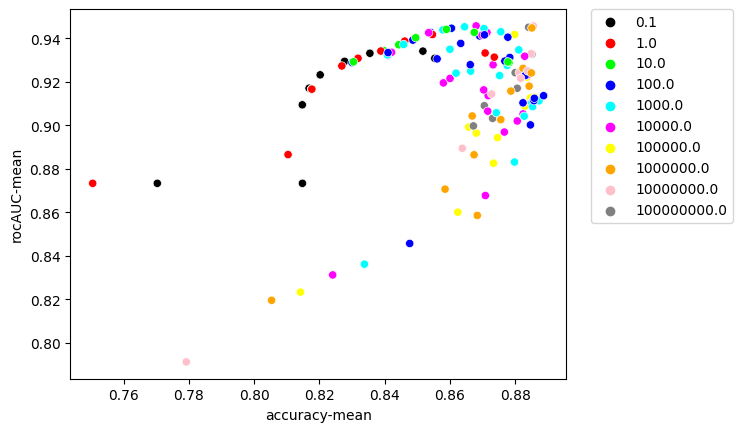

In [18]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="C_class", data=df, palette=seventeenColors[:10], legendOutsideGraph=True)


In [19]:
twoColors = ['b', 'r']

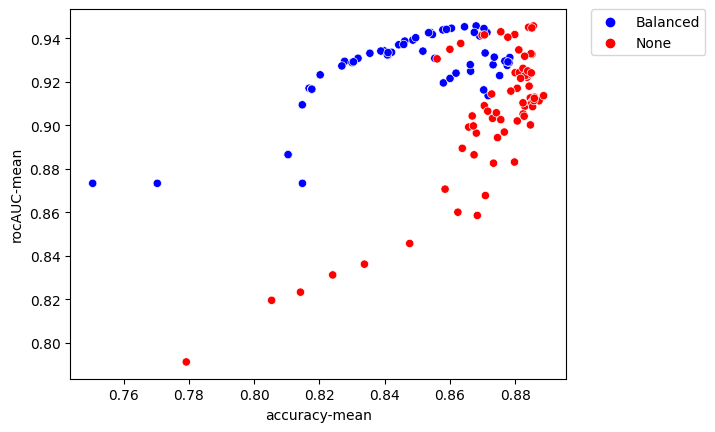

In [20]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="weight", data=df, palette=twoColors, legendOutsideGraph=True)


## Quantum

In [2]:
df = pd.read_csv("hyperParamOpt/jobsOutput/withoutTtype/minOfK5/quantumKernel/hyperParOptResults2.csv", index_col=0)
df = addMeanAndStdDev(df, classical=False)

In [3]:
df[df.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight


In [5]:
df[(df['alpha']=='0.05') & (df['C_quant']==500)].iloc[:,-16:]#non-optimised version which was sent to Ofer

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.05', '500', 'None', 'ZandYZ', 'Balanced')",11410.687039,1814.353888,0.94182,0.003688,0.898595,0.038454,0.85372,0.045277,0.003916,0.042794,0.053036,0.05,500.0,None,ZandYZ,Balanced


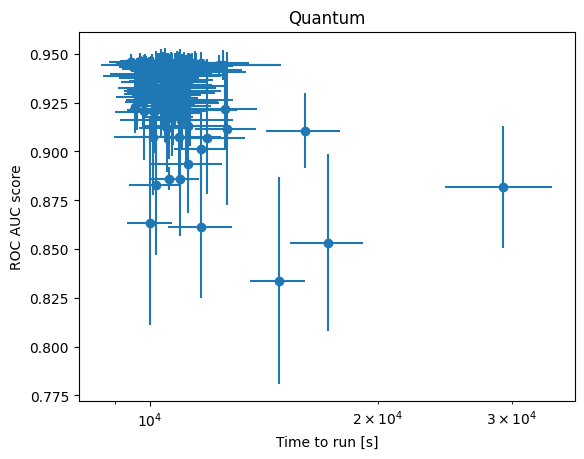

In [6]:
scatterplotWithErrors(x=df['TimeToRun-mean'], y=df["rocAUC-mean"], x_err=df['TimeToRun-std'], y_err=df["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Quantum')


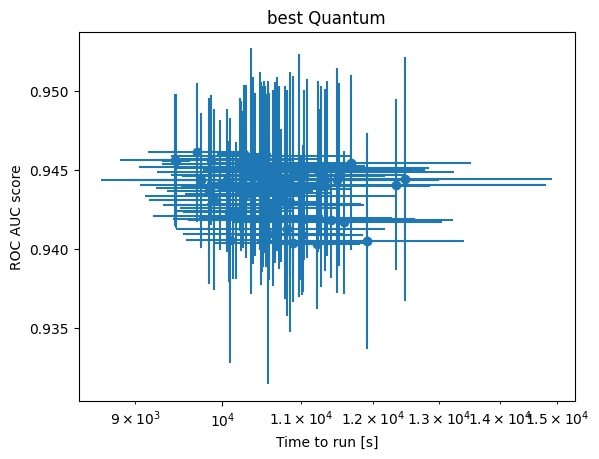

In [7]:
df_highROC = df[df['rocAUC-mean']>0.94]
scatterplotWithErrors(x=df_highROC['TimeToRun-mean'], y=df_highROC["rocAUC-mean"], x_err=df_highROC['TimeToRun-std'], y_err=df_highROC["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='best Quantum')


In [8]:
(df_highROC.sort_values(by='C_quant')['C_quant'])

('0.13', '10', 'None', 'ZandZX', 'Balanced')                10.0
('0.5', '10', 'None', 'ZandZX', 'Balanced')                 10.0
('0.1', '100', 'None', 'ZandYZ', 'Balanced')               100.0
('0.05', '500', 'None', 'ZandYZ', 'Balanced')              500.0
('0.1', '500', 'None', 'ZandYZ', 'Balanced')               500.0
                                                        ...     
('0.03', '10000000.0', 'None', 'XandZZ', 'None')      10000000.0
('0.03', '10000000.0', 'None', 'ZandZZ', 'None')      10000000.0
('0.03', '100000000.0', 'None', 'ZandZX', 'None')    100000000.0
('0.02', '100000000.0', 'None', 'ZandZX', 'None')    100000000.0
('0.01', '100000000.0', 'None', 'ZandZX', 'None')    100000000.0
Name: C_quant, Length: 77, dtype: float64

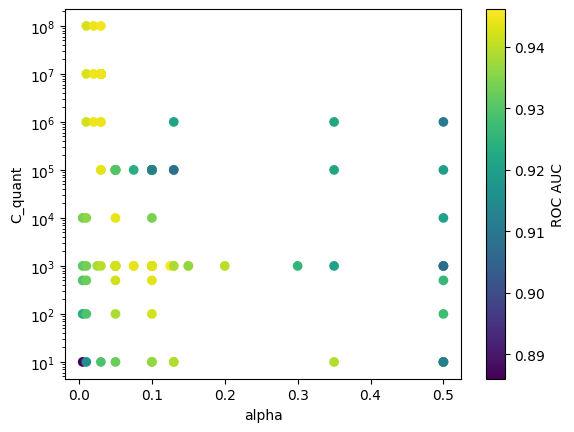

In [9]:
df2=df[df['alpha'].astype(float)<0.6]
plt.scatter(df2['alpha'].astype(float), df2['C_quant'], c=df2['rocAUC-mean'])
plt.xlabel('alpha')
plt.ylabel('C_quant')
plt.semilogy()
cbar = plt.colorbar() 
cbar.set_label('ROC AUC')

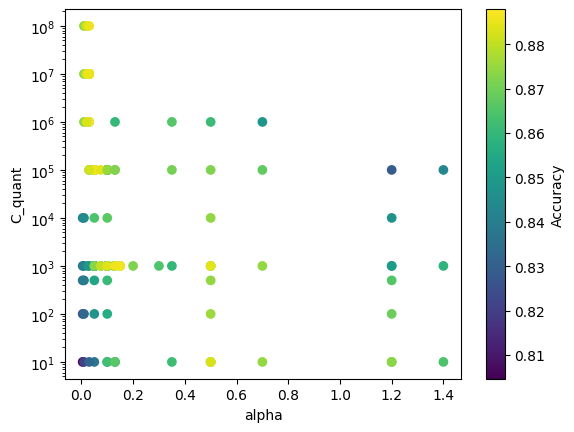

In [10]:
df3=df[df['alpha'].astype(float)<4]
plt.scatter(df3['alpha'].astype(float), df3['C_quant'], c=df3['accuracy-mean'])
plt.xlabel('alpha')
plt.ylabel('C_quant')
plt.semilogy()
cbar = plt.colorbar() 
cbar.set_label('Accuracy')

In [11]:
df_highROC[df_highROC['alpha']=='0.5'].iloc[:,-16:]

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.5', '10', 'None', 'ZandZX', 'Balanced')",11915.564308,1484.703678,0.940511,0.006844,0.911894,0.028174,0.87124,0.034422,0.007277,0.030896,0.03951,0.5,10.0,None,ZandZX,Balanced


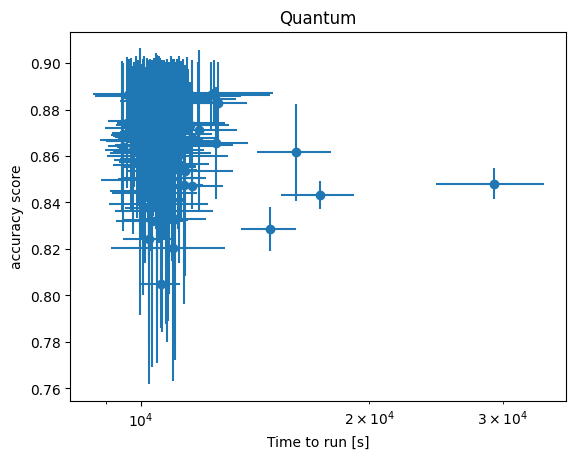

In [12]:
scatterplotWithErrors(x=df['TimeToRun-mean'], y=df["accuracy-mean"], x_err=df['TimeToRun-std'], y_err=df["accuracy-std"], xlabel='Time to run [s]', ylabel='accuracy score', title='Quantum')


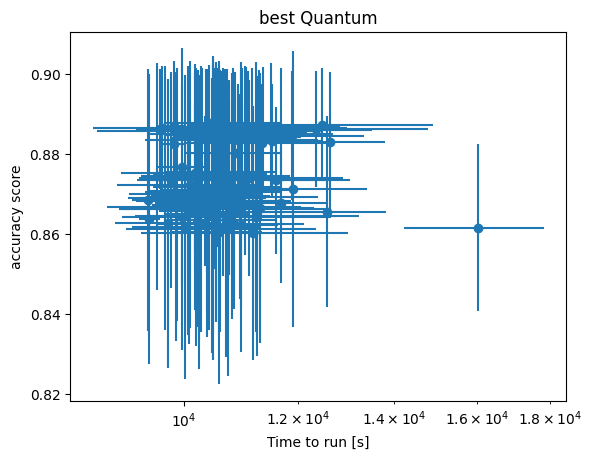

In [13]:
df_highAcc = df[df['accuracy-mean']>0.86]
scatterplotWithErrors(x=df_highAcc['TimeToRun-mean'], y=df_highAcc["accuracy-mean"], x_err=df_highAcc['TimeToRun-std'], y_err=df_highAcc["accuracy-std"], xlabel='Time to run [s]', ylabel='accuracy score', title='best Quantum')


In [14]:
twoColors = ['b', 'r']
threeColors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'gray',]
fiveColors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
sixColors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
eightColors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'gray',]
nineColors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'gray', 'orange']
sevenColors = ['#000000', '#FF0000', '#00FF00','#0000FF','#00FFFF','#FF00FF','#FFFF00']
seventeenColors = ['#000000', '#FF0000', '#00FF00','#0000FF','#00FFFF','#FF00FF','#FFFF00','#FFA500','#FFC0CB','#808080','#A9A9A9','#D3D3D3','#A52A2A','#800080','#000080','#008080','#FFD700']
eighteenColors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E']


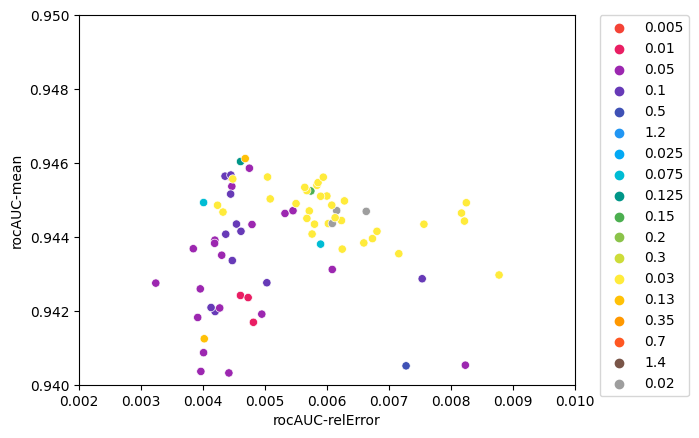

In [15]:
#ROC AUC For different alphas
axesRanges = [0.002,0.01, 0.94,0.95]
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="alpha", data=df, palette=eighteenColors, legendOutsideGraph=True, axesRanges=axesRanges)


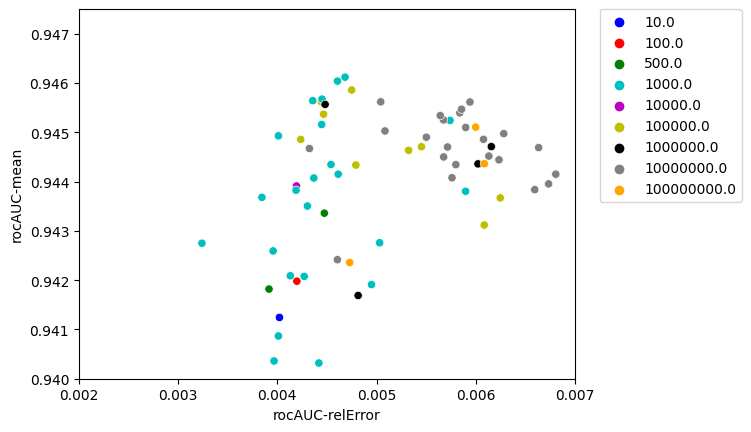

In [16]:
#ROC AUC For different regularization terms
axesRanges=[0.002,0.007, 0.94,0.9475]
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_quant", data=df, palette=nineColors, legendOutsideGraph=True, axesRanges=axesRanges)


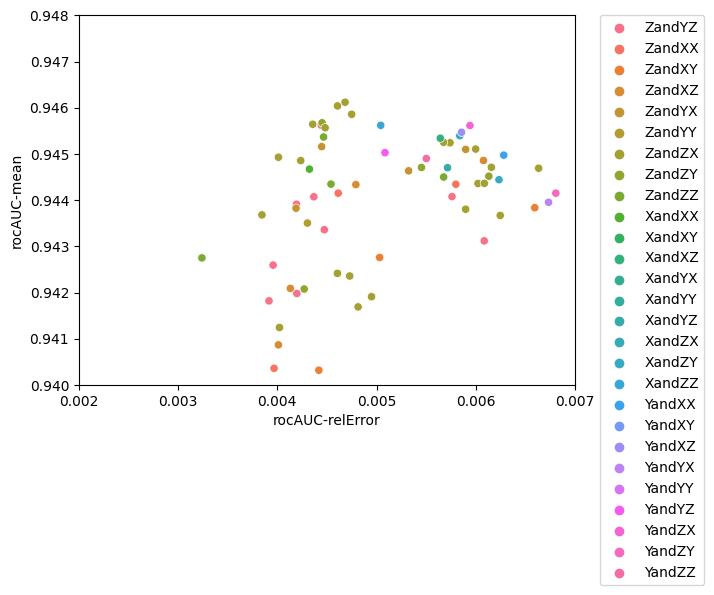

In [18]:
#ROC AUC For different interactions
axesRanges = [0.002,0.007, 0.94,0.948]
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="interaction", data=df, palette=None, legendOutsideGraph=True, axesRanges=axesRanges)


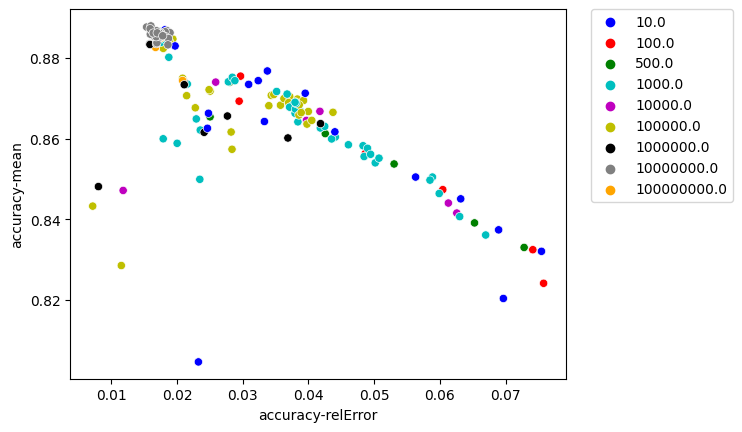

In [19]:
#Accuracy For different regularization terms
scatterplotColored(x="accuracy-relError", y="accuracy-mean", hue="C_quant", data=df, palette=nineColors, legendOutsideGraph=True)


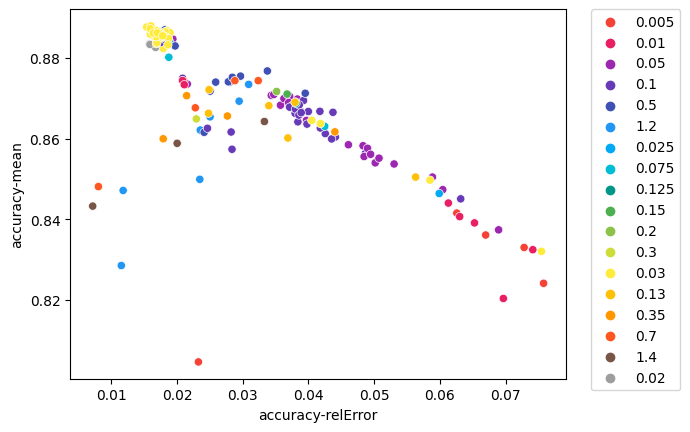

In [20]:
#Accuracy For different alphas
scatterplotColored(x="accuracy-relError", y="accuracy-mean", hue="alpha", data=df, palette=eighteenColors, legendOutsideGraph=True)


In [40]:
sorted(list(set([float(i) for i in list(df['alpha'])])))

[0.005,
 0.01,
 0.02,
 0.025,
 0.03,
 0.05,
 0.075,
 0.1,
 0.125,
 0.13,
 0.15,
 0.2,
 0.3,
 0.35,
 0.5,
 0.7,
 1.2,
 1.4]

In [22]:
alphaList = sorted(list(set([float(i) for i in list(df['alpha'])])))
eighteenAlphas = [str(j) for j in alphaList]
cmap = plt.cm.get_cmap('viridis')
eighteenDarknessIncreasingColors = [cmap(i) for i in np.linspace(0, 1, len(alphaList))]
alphaColors = dict(zip(eighteenAlphas, eighteenDarknessIncreasingColors))

In [23]:
alphaColors

{'0.005': (0.267004, 0.004874, 0.329415, 1.0),
 '0.01': (0.281924, 0.089666, 0.412415, 1.0),
 '0.02': (0.280255, 0.165693, 0.476498, 1.0),
 '0.025': (0.263663, 0.237631, 0.518762, 1.0),
 '0.03': (0.237441, 0.305202, 0.541921, 1.0),
 '0.05': (0.208623, 0.367752, 0.552675, 1.0),
 '0.075': (0.182256, 0.426184, 0.55712, 1.0),
 '0.1': (0.159194, 0.482237, 0.558073, 1.0),
 '0.125': (0.13777, 0.537492, 0.554906, 1.0),
 '0.13': (0.121148, 0.592739, 0.544641, 1.0),
 '0.15': (0.128087, 0.647749, 0.523491, 1.0),
 '0.2': (0.180653, 0.701402, 0.488189, 1.0),
 '0.3': (0.274149, 0.751988, 0.436601, 1.0),
 '0.35': (0.395174, 0.797475, 0.367757, 1.0),
 '0.5': (0.535621, 0.835785, 0.281908, 1.0),
 '0.7': (0.688944, 0.865448, 0.182725, 1.0),
 '1.2': (0.845561, 0.887322, 0.099702, 1.0),
 '1.4': (0.993248, 0.906157, 0.143936, 1.0)}

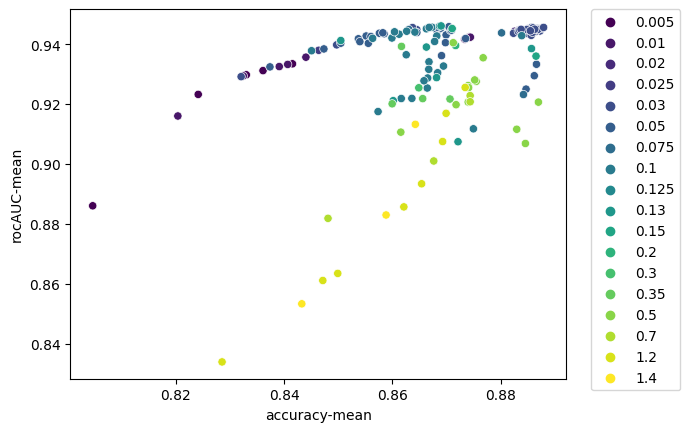

In [24]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="alpha", data=df.sort_values(by='alpha'), palette=alphaColors, legendOutsideGraph=True)


In [27]:
df[(df['accuracy-mean']>0.885)&(df['rocAUC-mean']>0.94)].iloc[:,-16:]

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.03', '1000000.0', 'None', 'ZandZX', 'None')",10816.586810,2180.081295,0.944360,0.005688,0.927670,0.007904,0.88652,0.015040,0.006023,0.008520,0.016966,0.03,1000000.0,None,ZandZX,None
"('0.03', '10000000.0', 'None', 'ZandZX', 'None')",10569.548387,403.511206,0.945252,0.005365,0.927867,0.008704,0.88672,0.016409,0.005676,0.009381,0.018505,0.03,10000000.0,None,ZandZX,None
"('0.03', '10000000.0', 'None', 'XandXY', 'None')",10796.078887,611.277968,0.943545,0.006756,0.926829,0.008134,0.88500,0.015297,0.007160,0.008776,0.017285,0.03,10000000.0,None,XandXY,None
"('0.03', '10000000.0', 'None', 'XandXZ', 'None')",10521.489135,328.302807,0.945340,0.005335,0.927586,0.009069,0.88624,0.016787,0.005643,0.009777,0.018941,0.03,10000000.0,None,XandXZ,None
"('0.03', '10000000.0', 'None', 'XandYX', 'None')",11487.821841,1319.400162,0.944343,0.007144,0.927810,0.008419,0.88648,0.016129,0.007565,0.009074,0.018194,0.03,10000000.0,None,XandYX,None
"('0.03', '10000000.0', 'None', 'XandYY', 'None')",10978.604532,1197.745930,0.944644,0.007719,0.926802,0.009195,0.88532,0.016096,0.008171,0.009922,0.018181,0.03,10000000.0,None,XandYY,None
"('0.03', '10000000.0', 'None', 'XandYZ', 'None')",11042.111356,994.776812,0.944702,0.005400,0.927319,0.008708,0.88620,0.015560,0.005716,0.009390,0.017558,0.03,10000000.0,None,XandYZ,None
"('0.03', '10000000.0', 'None', 'XandZX', 'None')",10685.573150,986.369924,0.945395,0.005521,0.928283,0.007251,0.88764,0.013651,0.005839,0.007811,0.015379,0.03,10000000.0,None,XandZX,None
"('0.03', '10000000.0', 'None', 'XandZY', 'None')",10489.304095,151.510047,0.944442,0.005888,0.926866,0.007914,0.88532,0.014658,0.006235,0.008539,0.016557,0.03,10000000.0,None,XandZY,None
"('0.03', '10000000.0', 'None', 'XandZZ', 'None')",10296.100182,143.075641,0.945619,0.004768,0.926976,0.008970,0.88572,0.015639,0.005043,0.009677,0.017657,0.03,10000000.0,None,XandZZ,None


In [28]:
sevenDarknessIncreasingColors = [cmap(i) for i in np.linspace(0, 1, 9)]
cColors = dict(zip(sorted(list(set(df.sort_values(by='C_quant')['C_quant']))), sevenDarknessIncreasingColors))


In [29]:
cColors

{10.0: (0.267004, 0.004874, 0.329415, 1.0),
 100.0: (0.278826, 0.17549, 0.483397, 1.0),
 500.0: (0.229739, 0.322361, 0.545706, 1.0),
 1000.0: (0.172719, 0.448791, 0.557885, 1.0),
 10000.0: (0.127568, 0.566949, 0.550556, 1.0),
 100000.0: (0.157851, 0.683765, 0.501686, 1.0),
 1000000.0: (0.369214, 0.788888, 0.382914, 1.0),
 10000000.0: (0.678489, 0.863742, 0.189503, 1.0),
 100000000.0: (0.993248, 0.906157, 0.143936, 1.0)}

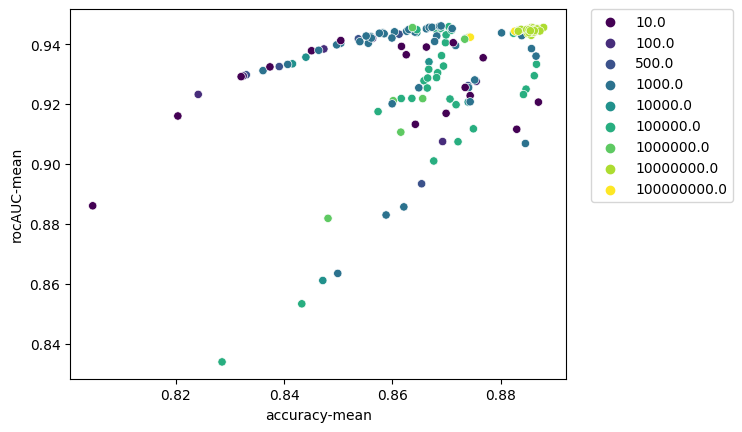

In [30]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="C_quant", data=df, palette=cColors, legendOutsideGraph=True)


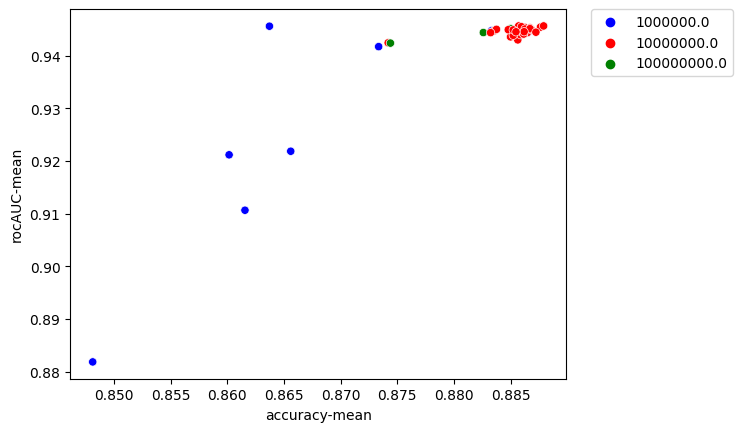

In [31]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="C_quant", data=df[df['C_quant']>1.0e5], palette=nineColors[:3], legendOutsideGraph=True)


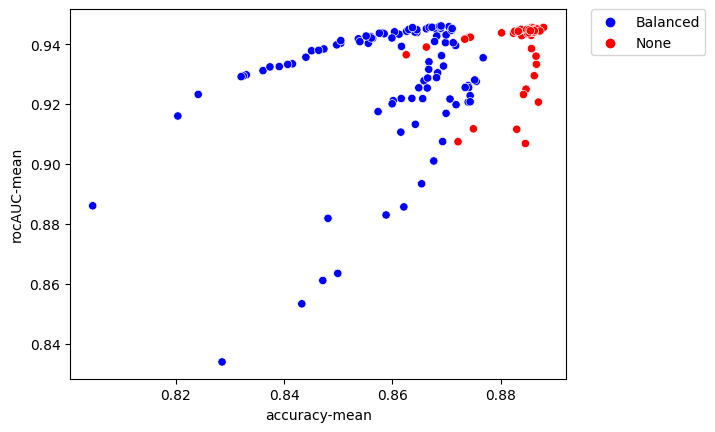

In [32]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="weight", data=df, palette=twoColors, legendOutsideGraph=True)


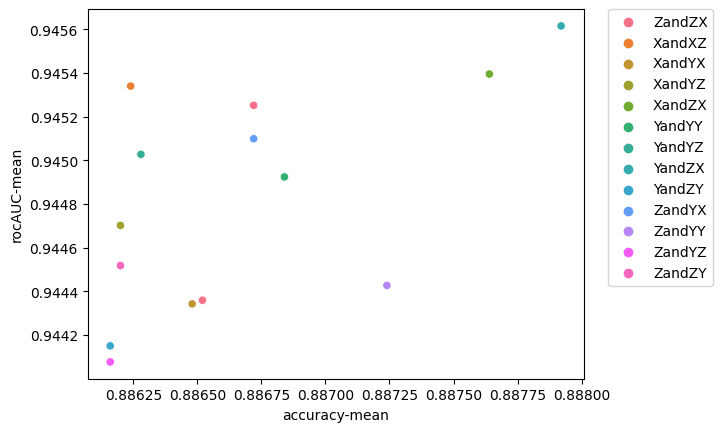

In [44]:
df_highROCandAcc = df[(df['accuracy-mean']>0.886) & (df['rocAUC-mean']>0.94)]

scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="interaction", data=df_highROCandAcc, palette=None, legendOutsideGraph=True)


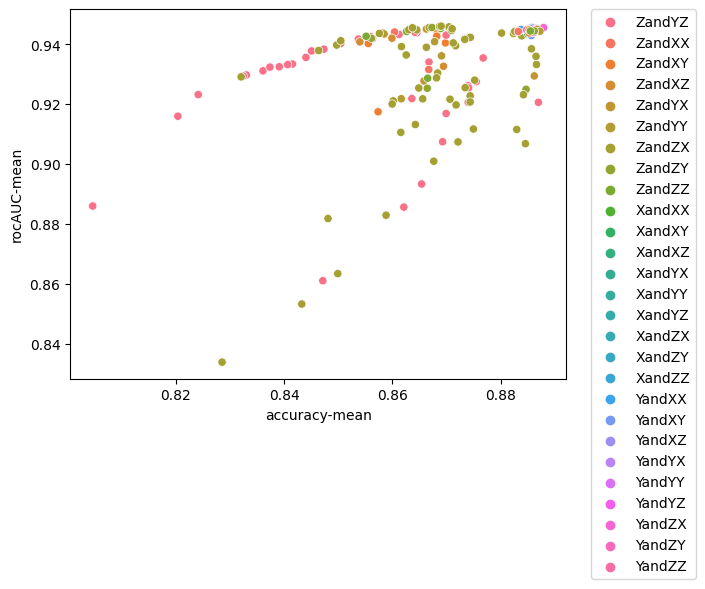

In [47]:
scatterplotColored(x="accuracy-mean", y="rocAUC-mean", hue="interaction", data=df, palette=None, legendOutsideGraph=True)


In [46]:
df_highROCandAcc.sort_values(by="rocAUC-relError").iloc[:,-16:]

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.03', '10000000.0', 'None', 'YandYZ', 'None')",11273.710532,1509.221760,0.945028,0.004806,0.927345,0.008001,0.88628,0.014650,0.005086,0.008628,0.016529,0.03,10000000.0,None,YandYZ,None
"('0.03', '10000000.0', 'None', 'XandXZ', 'None')",10521.489135,328.302807,0.945340,0.005335,0.927586,0.009069,0.88624,0.016787,0.005643,0.009777,0.018941,0.03,10000000.0,None,XandXZ,None
"('0.03', '10000000.0', 'None', 'ZandZX', 'None')",10569.548387,403.511206,0.945252,0.005365,0.927867,0.008704,0.88672,0.016409,0.005676,0.009381,0.018505,0.03,10000000.0,None,ZandZX,None
"('0.03', '10000000.0', 'None', 'XandYZ', 'None')",11042.111356,994.776812,0.944702,0.005400,0.927319,0.008708,0.88620,0.015560,0.005716,0.009390,0.017558,0.03,10000000.0,None,XandYZ,None
"('0.03', '10000000.0', 'None', 'ZandYZ', 'None')",12347.829848,2448.925223,0.944077,0.005439,0.927399,0.007769,0.88616,0.014515,0.005761,0.008377,0.016380,0.03,10000000.0,None,ZandYZ,None
"('0.03', '10000000.0', 'None', 'XandZX', 'None')",10685.573150,986.369924,0.945395,0.005521,0.928283,0.007251,0.88764,0.013651,0.005839,0.007811,0.015379,0.03,10000000.0,None,XandZX,None
"('0.03', '10000000.0', 'None', 'ZandYX', 'None')",11355.596984,1492.610862,0.945099,0.005575,0.927709,0.008149,0.88672,0.014963,0.005899,0.008784,0.016875,0.03,10000000.0,None,ZandYX,None
"('0.03', '10000000.0', 'None', 'YandZX', 'None')",10470.306660,113.437538,0.945615,0.005619,0.928535,0.007310,0.88792,0.014234,0.005942,0.007873,0.016031,0.03,10000000.0,None,YandZX,None
"('0.03', '1000000.0', 'None', 'ZandZX', 'None')",10816.586810,2180.081295,0.944360,0.005688,0.927670,0.007904,0.88652,0.015040,0.006023,0.008520,0.016966,0.03,1000000.0,None,ZandZX,None
"('0.03', '10000000.0', 'None', 'ZandZY', 'None')",10711.778578,120.520929,0.944518,0.005792,0.927338,0.008272,0.88620,0.015053,0.006132,0.008920,0.016986,0.03,10000000.0,None,ZandZY,None


# OLD (with T-TYPE)

## RBF

In [86]:
df = pd.read_csv("hyperParamOpt/jobsOutput/RBF/hyperParOptResults2.csv", index_col=0)
df = addMeanAndStdDev(df)

In [73]:
df[df.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight


In [85]:
df[df['C_class']==1000000].iloc[:,-15:]#the parameters optimizaed for tracking was (c=10**6, gamma=1, weight=none)

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '1000000.0', 'scale', 'None')",3837.646170,984.131555,0.970585,0.008349,0.956802,0.007117,0.93396,0.011113,0.008602,0.007439,0.011899,RBF,1000000.0,scale,None
"('RBF', '1000000.0', 'auto', 'None')",281.741128,52.479033,0.980165,0.005127,0.962864,0.006821,0.94288,0.010906,0.005230,0.007084,0.011566,RBF,1000000.0,auto,None
"('RBF', '1000000.0', '1', 'None')",2743.011165,311.169642,0.973579,0.003824,0.959578,0.005874,0.93796,0.009357,0.003928,0.006122,0.009976,RBF,1000000.0,1,None
"('RBF', '1000000.0', '1', 'Balanced')",3191.387099,1140.098077,0.971645,0.006492,0.951345,0.006030,0.92712,0.008481,0.006682,0.006339,0.009148,RBF,1000000.0,1,Balanced
"('RBF', '1000000.0', 'scale', 'Balanced')",5043.786844,969.288595,0.970608,0.005295,0.949172,0.009242,0.92404,0.012553,0.005456,0.009737,0.013585,RBF,1000000.0,scale,Balanced
"('RBF', '1000000.0', 'auto', 'Balanced')",281.852699,61.041271,0.979643,0.004689,0.951214,0.009046,0.92744,0.012350,0.004787,0.009510,0.013316,RBF,1000000.0,auto,Balanced


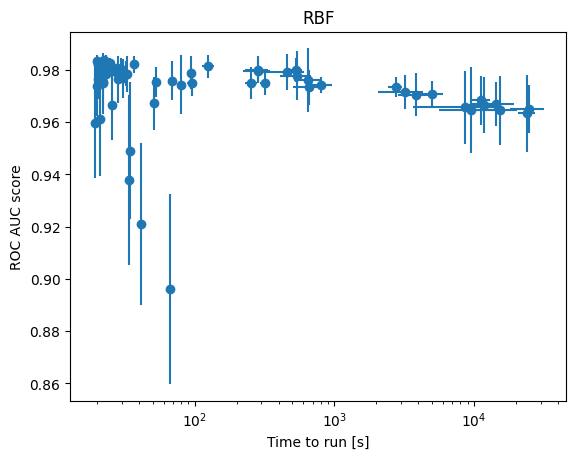

In [65]:
scatterplotWithErrors(x=df['TimeToRun-mean'], y=df["rocAUC-mean"], x_err=df['TimeToRun-std'], y_err=df["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='RBF')

In [71]:
list(df['weight'].unique())

['Balanced', 'None']

In [5]:
decreasingColorDarkness={100000000: "#F8D1CC",
10000000: "#F3BFB7",
1000000: "#EEA8A1",
100000: "#E9918C",
10000: "#E47A76",
1000: "#DF6261",
100: "#DA4B4B",
10: "#D53F3F",
1: "#CF3333",
0.1: "#C92828"}

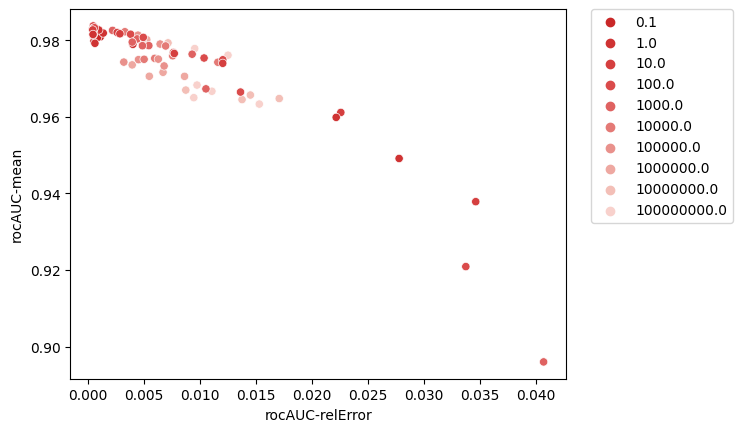

In [6]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df, palette=decreasingColorDarkness, legendOutsideGraph=True)


In [7]:
df2 = df[df['C_class']<10**6]

In [8]:
decreasingColorDarkness2={100000: "#E9918C",
10000: "#E47A76",
1000: "#DF6261",
100: "#DA4B4B",
10: "#D53F3F",
1: "#CF3333",
0.1: "#C92828"}

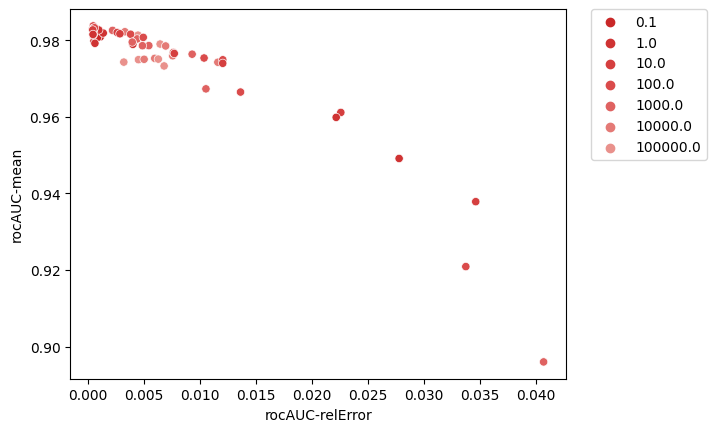

In [9]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df2, palette=decreasingColorDarkness2, legendOutsideGraph=True)

In [10]:
multicolors = {0.1: "#1f77b4",
1.0: "#ff7f0e",
10: "#2ca02c",
100: "#d62728",
1000: "#9467bd",
10000: "#8c564b",
100000: "#e377c2"}

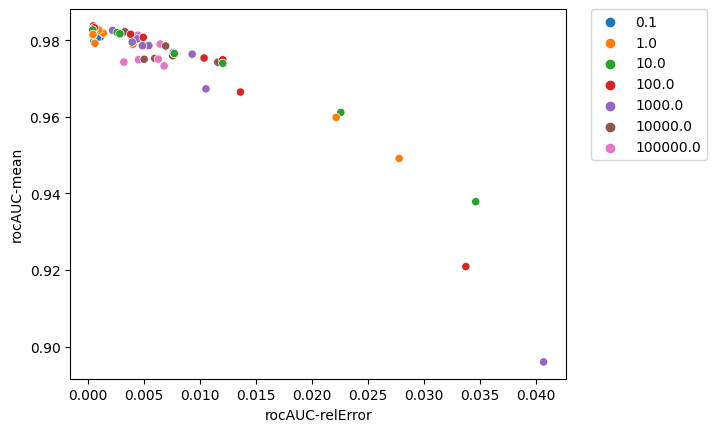

In [11]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df2, palette=multicolors, legendOutsideGraph=True)

In [12]:
multicolors2 = {0.1: "#1f77b4",
1.0: "#ff7f0e",
10: "#2ca02c",
100: "#d62728",
1000: "#9467bd",
10000: "#8c564b",
100000: "#e377c2",
1000000: "#7f7f7f",
10000000: "#bcbd22",
100000000: "#17becf"}

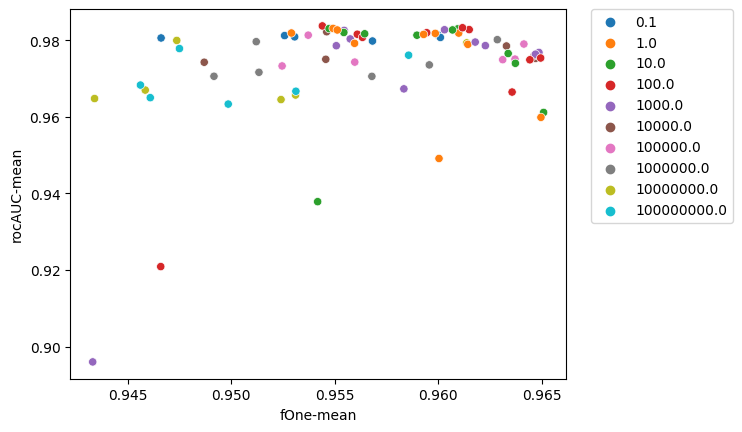

In [13]:
scatterplotColored(x="fOne-mean", y="rocAUC-mean", hue="C_class", data=df, palette=multicolors2, legendOutsideGraph=True)


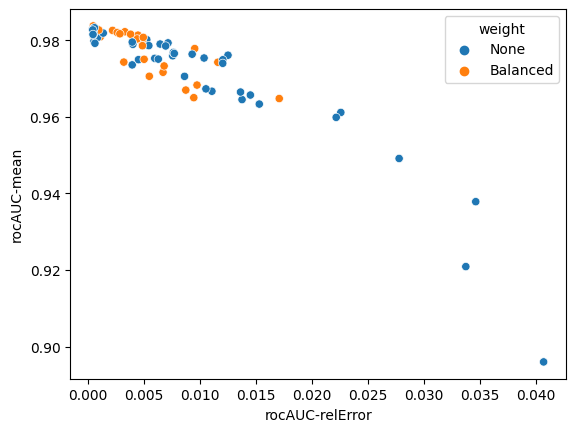

In [14]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="weight", data=df, palette=None, legendOutsideGraph=False)


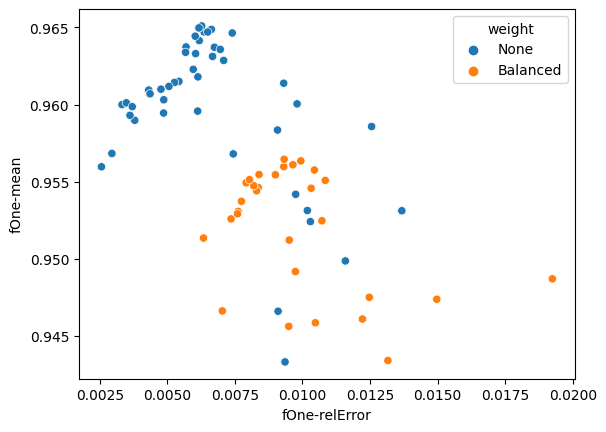

In [15]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="weight", data=df, palette=None, legendOutsideGraph=False)


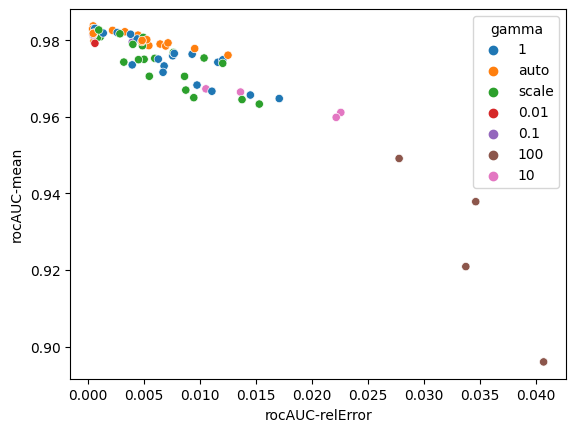

In [87]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df, palette=None, legendOutsideGraph=False)


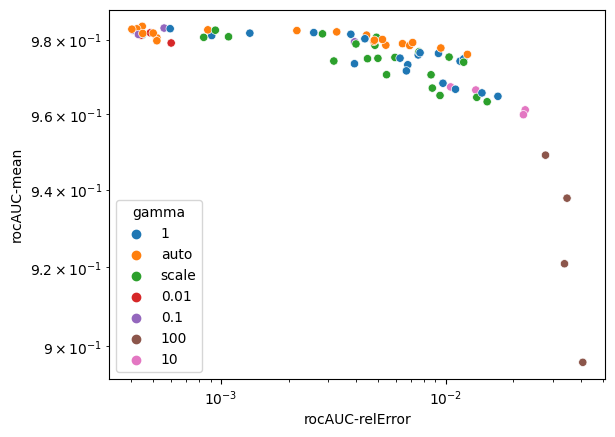

In [88]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df, palette=None, legendOutsideGraph=False, loglog=True)


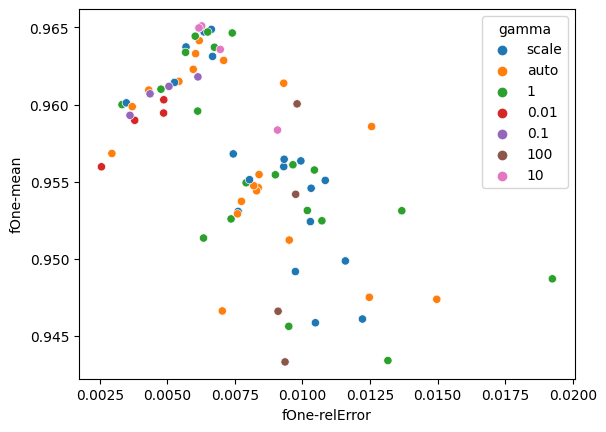

In [17]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="gamma", data=df, palette=None, legendOutsideGraph=False)


## Sigmoid

In [19]:
df_sig = pd.read_csv("hyperParamOpt/jobsOutput/sigmoid/hyperParOptResults2.csv", index_col=0)
df_sig = addMeanAndStdDev(df_sig)

In [20]:
df_sig[df_sig.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight


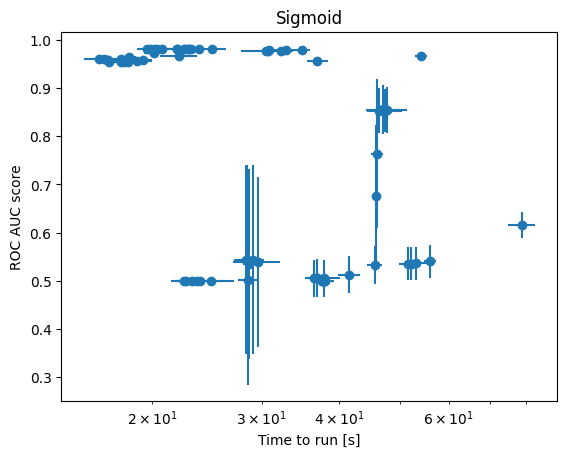

In [74]:
scatterplotWithErrors(x=df_sig['TimeToRun-mean'], y=df_sig["rocAUC-mean"], x_err=df_sig['TimeToRun-std'], y_err=df_sig["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Sigmoid')


In [9]:
decreasingColorDarkness3={10000: "#F8D1CC",
1000: "#EEA8A1",
100: "#E9918C",
10: "#DF6261",
1: "#CF3333",
0.1: "#C92828"}

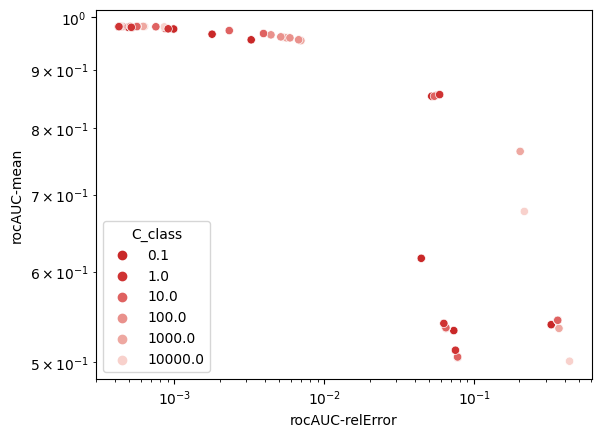

In [11]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df_sig, palette=decreasingColorDarkness3, legendOutsideGraph=False, loglog=True)


## Poly

In [36]:
df_poly = pd.read_csv("hyperParamOpt/jobsOutput/poly/hyperParOptResults2.csv", index_col=0)
df_poly = addMeanAndStdDev(df_poly)

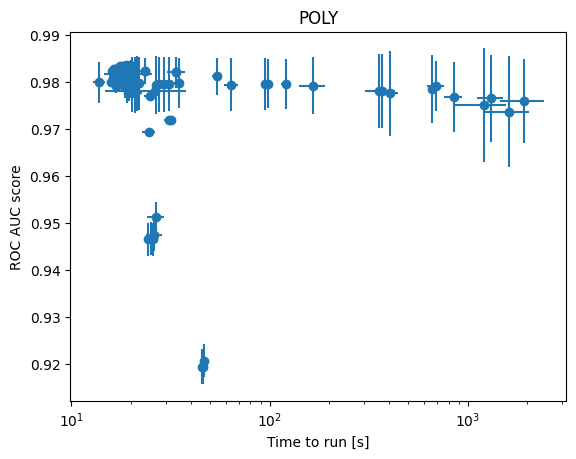

In [37]:
scatterplotWithErrors(x=df_poly['TimeToRun-mean'], y=df_poly["rocAUC-mean"], x_err=df_poly['TimeToRun-std'], y_err=df_poly["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score',title='POLY')


In [40]:
df_poly['gamma'].unique()

array(['0.01', '0.1', '10', '1', 'auto', 'scale', '0.5', '2'],
      dtype=object)

## COMPARE CLASSICAL KERNELS

In [4]:
df_rbf = pd.read_csv("hyperParamOpt/jobsOutput/classicalKernel/RBF/hyperParOptResults2.csv", index_col=0)
df_rbf = addMeanAndStdDev(df_rbf, classical=True)
df_rbf = df_rbf[df_rbf['rocAUC-mean']>0.983]
df_rbf = df_rbf[df_rbf['TimeToRun-mean']<50]

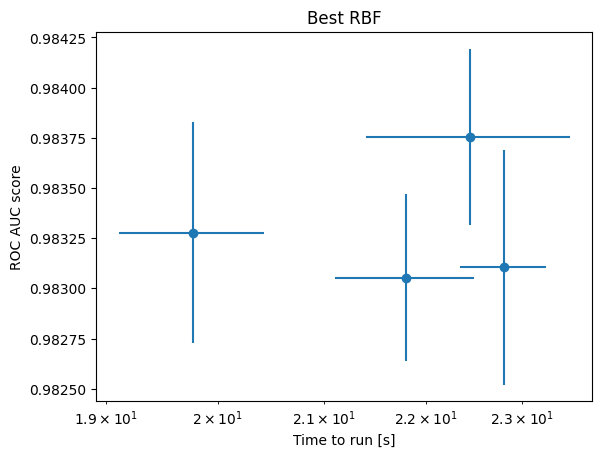

In [5]:
scatterplotWithErrors(x=df_rbf['TimeToRun-mean'], y=df_rbf["rocAUC-mean"], x_err=df_rbf['TimeToRun-std'], y_err=df_rbf["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Best RBF')


In [6]:
df_rbf.iloc[:,-13:]

,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '100', '0.1', 'None')",0.983278,0.000550,0.961182,0.004863,0.94040,0.007499,0.000560,0.005059,0.007975,RBF,100.0,0.1,None
"('RBF', '100', 'auto', 'Balanced')",0.983754,0.000440,0.954410,0.007924,0.93188,0.010847,0.000447,0.008302,0.011640,RBF,100.0,auto,Balanced
"('RBF', '10', 'auto', 'Balanced')",0.983054,0.000416,0.954737,0.007825,0.93232,0.010738,0.000423,0.008196,0.011518,RBF,10.0,auto,Balanced
"('RBF', '1.0', '1', 'Balanced')",0.983106,0.000585,0.954930,0.007557,0.93260,0.010391,0.000595,0.007914,0.011142,RBF,1.0,1,Balanced


In [33]:
df_sig = pd.read_csv("hyperParamOpt/jobsOutput/sigmoid/hyperParOptResults2.csv", index_col=0)
df_sig = addMeanAndStdDev(df_sig)
df_sig = df_sig[df_sig['rocAUC-mean']>0.9815]

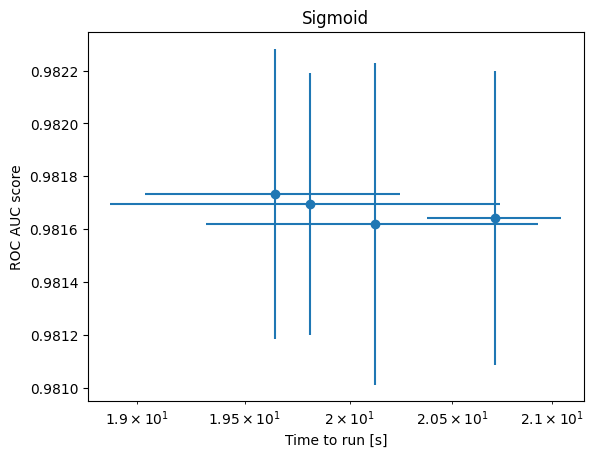

In [34]:
scatterplotWithErrors(x=df_sig['TimeToRun-mean'], y=df_sig["rocAUC-mean"], x_err=df_sig['TimeToRun-std'], y_err=df_sig["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Sigmoid')


In [35]:
df_sig.iloc[:,-13:]#kernel is not RBF! I didn't change it for the sake of time.

,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '1000', '0.01', 'Balanced')",0.981620,0.000608,0.953836,0.008100,0.93104,0.011113,0.000619,0.008492,0.011937,RBF,1000.0,0.01,Balanced
"('RBF', '1000', '0.01', 'None')",0.981734,0.000550,0.959080,0.004620,0.93724,0.007156,0.000560,0.004817,0.007635,RBF,1000.0,0.01,None
"('RBF', '100', '0.01', 'Balanced')",0.981641,0.000555,0.953578,0.007751,0.93068,0.010660,0.000566,0.008129,0.011454,RBF,100.0,0.01,Balanced
"('RBF', '100', '0.01', 'None')",0.981695,0.000497,0.959190,0.003947,0.93752,0.005907,0.000506,0.004114,0.006301,RBF,100.0,0.01,None


In [11]:
df_poly_all = pd.read_csv("hyperParamOpt/jobsOutput/poly/hyperParOptResults2.csv", index_col=0)
df_poly_all = addMeanAndStdDev(df_poly_all)

In [64]:
df_poly = pd.read_csv("hyperParamOpt/jobsOutput/poly/hyperParOptResults2.csv", index_col=0)
df_poly = addMeanAndStdDev(df_poly)

In [67]:
df_poly = df_poly[df_poly['rocAUC-mean']>0.983]

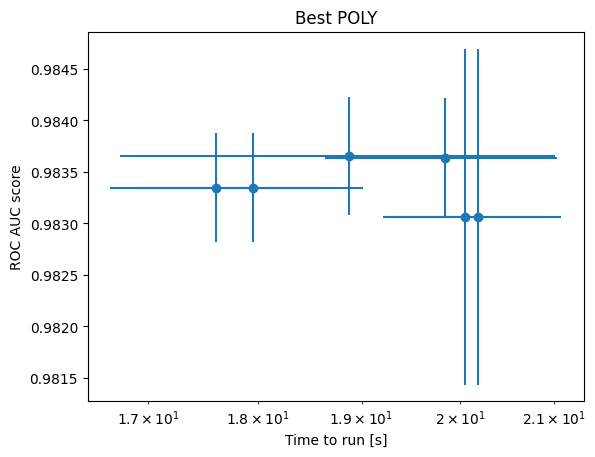

In [68]:
scatterplotWithErrors(x=df_poly['TimeToRun-mean'], y=df_poly["rocAUC-mean"], x_err=df_poly['TimeToRun-std'], y_err=df_poly["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score',title='Best POLY')


In [69]:
#df_poly

In [70]:
df_poly.iloc[:,-13:]#kernel is not RBF! I didn't change it for the sake of time.

,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,kernel,C_class,gamma,weight
"('RBF', '10000', '0.1', 'Balanced')",0.983067,0.001631,0.954783,0.007652,0.93244,0.010435,0.001659,0.008014,0.011191,RBF,10000.0,0.1,Balanced
"('RBF', '1000', '0.1', 'Balanced')",0.983348,0.000528,0.954179,0.008553,0.93160,0.011757,0.000537,0.008964,0.012620,RBF,1000.0,0.1,Balanced
"('RBF', '1000', 'auto', 'Balanced')",0.983654,0.000574,0.954280,0.008604,0.93176,0.011804,0.000583,0.009016,0.012668,RBF,1000.0,auto,Balanced
"('RBF', '10', '1', 'Balanced')",0.983066,0.001630,0.954730,0.007594,0.93236,0.010351,0.001658,0.007954,0.011102,RBF,10.0,1,Balanced
"('RBF', '1', '1', 'Balanced')",0.983348,0.000527,0.954179,0.008553,0.93160,0.011757,0.000536,0.008964,0.012620,RBF,1.0,1,Balanced
"('RBF', '1', 'scale', 'Balanced')",0.983636,0.000582,0.954229,0.008518,0.93168,0.011686,0.000592,0.008926,0.012542,RBF,1.0,scale,Balanced


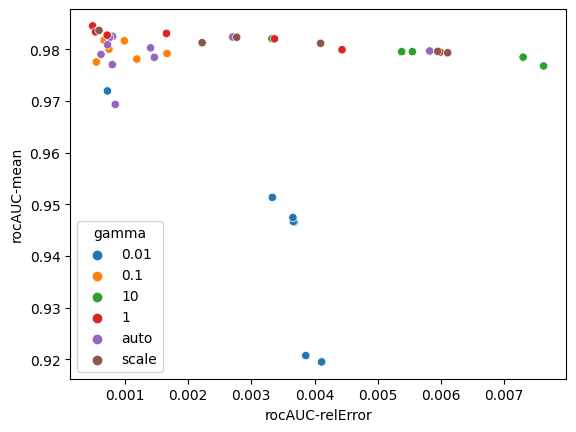

In [26]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="gamma", data=df_poly_test, palette=None, legendOutsideGraph=False)


In [32]:
#df_poly_test[df_poly_test['gamma']=='1'].iloc[:,-13:]

In [33]:
#df_poly_test

In [39]:
decreasingColorDarkness3={10000: "#F8D1CC",
1000: "#EEA8A1",
100: "#E9918C",
10: "#DF6261",
1: "#CF3333",
0.1: "#C92828"}

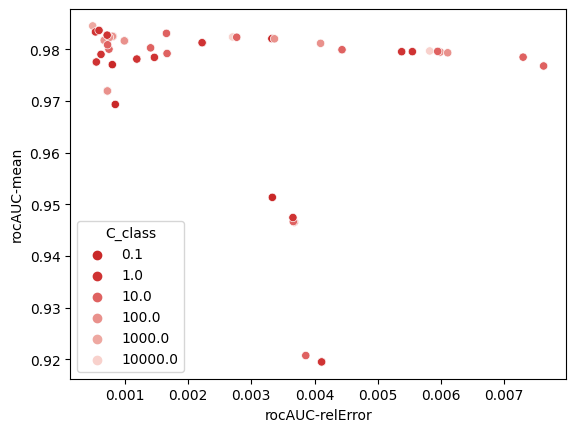

In [40]:

scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_class", data=df_poly_test, palette=decreasingColorDarkness3, legendOutsideGraph=False)


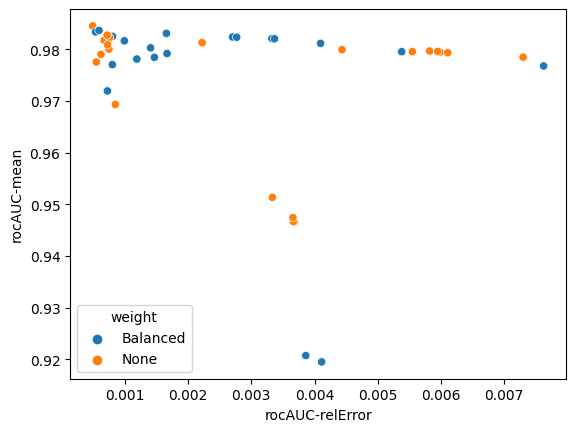

In [46]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="weight", data=df_poly_test, palette=None, legendOutsideGraph=False)


## Quantum Kernel

In [2]:
df_q = pd.read_csv("hyperParamOpt/jobsOutput/quantumKernel/hyperParOptResults2.csv", index_col=0)
df_q = addMeanAndStdDev(df_q, classical=False)

In [3]:
df_q[df_q.isna().any(axis=1)]

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight


In [4]:
len(df_q)

111

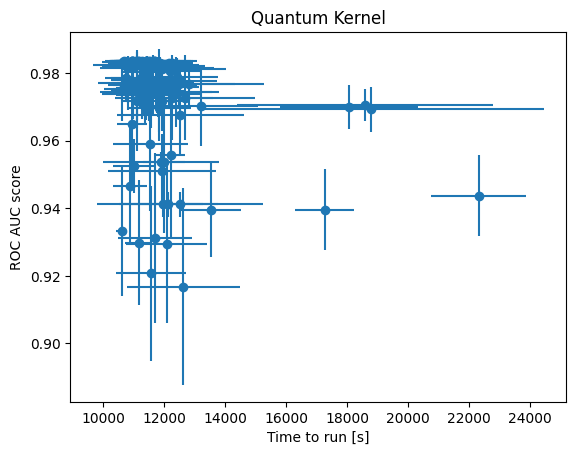

In [5]:
scatterplotWithErrors(x=df_q['TimeToRun-mean'], y=df_q["rocAUC-mean"], x_err=df_q['TimeToRun-std'], y_err=df_q["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Quantum Kernel', xscale='linear')





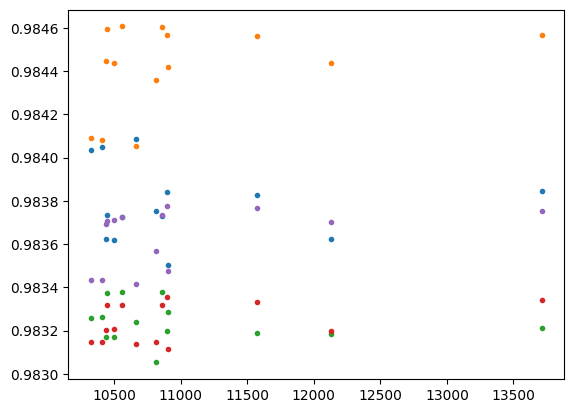

In [13]:
df2 = df_q[(df_q['rocAUC-mean']>0.9835) & (df_q['TimeToRun-mean']<13000)]
for i in range(5):
    plt.plot(df2['TimeToRun-fold0'.format(i)],df2['rocAUC-fold{}'.format(i)],'.')

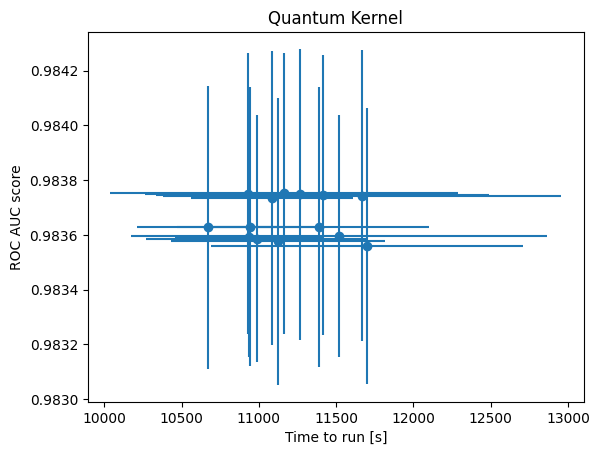

In [14]:
scatterplotWithErrors(x=df2['TimeToRun-mean'], y=df2["rocAUC-mean"], x_err=df2['TimeToRun-std'], y_err=df2["rocAUC-std"], xlabel='Time to run [s]', ylabel='ROC AUC score', title='Quantum Kernel', xscale='linear')


In [14]:
df2.iloc[:,-16:]

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.05', '1000', 'None', 'ZandZZ', 'None')",12142.312427,785.643809,0.983161,0.000598,0.961537,0.005099,0.94092,0.007923,0.000609,0.005303,0.008420,0.05,1000.0,None,ZandZZ,None
"('0.05', '100', 'None', 'ZandZZ', 'None')",12267.144194,679.728307,0.983067,0.000460,0.961082,0.003688,0.94036,0.005451,0.000468,0.003838,0.005796,0.05,100.0,None,ZandZZ,None
"('0.05', '500', 'None', 'ZandZZ', 'None')",11862.971767,699.561432,0.983157,0.000510,0.960976,0.004812,0.94008,0.007473,0.000519,0.005008,0.007950,0.05,500.0,None,ZandZZ,None
"('0.05', '500', 'None', 'ZandZZ', 'Balanced')",11052.324125,336.090249,0.983467,0.000486,0.954386,0.007906,0.93188,0.010865,0.000494,0.008284,0.011659,0.05,500.0,None,ZandZZ,Balanced
"('0.05', '1000', 'None', 'ZandZZ', 'Balanced')",11698.502886,1009.894476,0.983560,0.000505,0.954146,0.007731,0.93152,0.010592,0.000513,0.008103,0.011371,0.05,1000.0,None,ZandZZ,Balanced


In [16]:
multicolors = {10: "#1f77b4",
100: "#ff7f0e",
500: "#2ca02c",
1000: "#d62728",
5000: "#9467bd",
1000000: "#e377c2"}

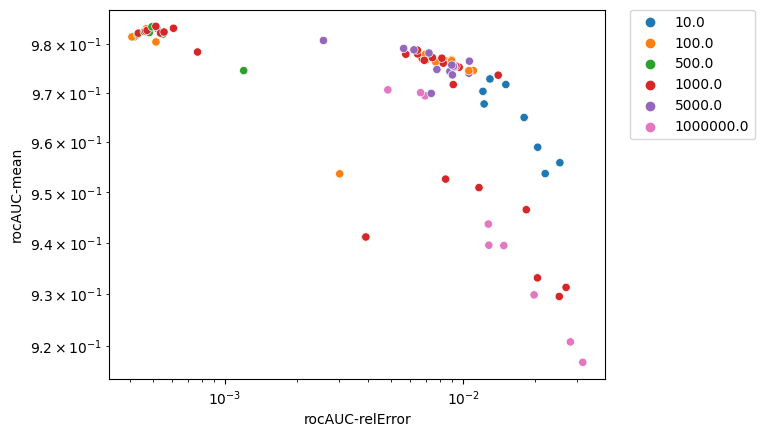

In [17]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_quant", data=df_q, palette=multicolors, legendOutsideGraph=True, loglog=True)


In [36]:
conditions = (df_q['rocAUC-mean']>0.983575) & (df_q['rocAUC-relError']<0.00053) & ((df_q['rocAUC-mean']>0.9837) | (df_q['rocAUC-relError']<0.00048))


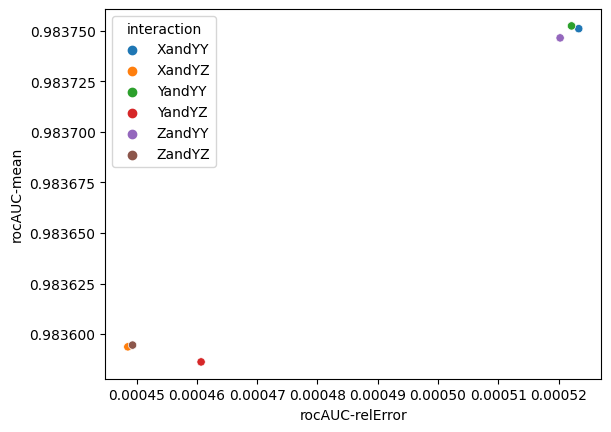

In [40]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="interaction", data=df_q[conditions], palette=None, legendOutsideGraph=False, loglog=False)


In [41]:
df_q[conditions].iloc[:,-16:].sort_values(by='rocAUC-relError', ascending=True)
     
     

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.05', '500', 'None', 'XandYZ', 'Balanced')",10938.807840,484.182302,0.983594,0.000441,0.954278,0.007990,0.93172,0.010953,0.000449,0.008373,0.011756,0.05,500.0,None,XandYZ,Balanced
"('0.05', '500', 'None', 'ZandYZ', 'Balanced')",11518.367455,1346.987276,0.983595,0.000442,0.954271,0.008148,0.93172,0.011184,0.000449,0.008538,0.012003,0.05,500.0,None,ZandYZ,Balanced
"('0.05', '500', 'None', 'YandYZ', 'Balanced')",10984.889583,714.528508,0.983586,0.000453,0.954221,0.008123,0.93164,0.011150,0.000461,0.008512,0.011968,0.05,500.0,None,YandYZ,Balanced
"('0.05', '500', 'None', 'ZandYY', 'Balanced')",11413.708182,1076.413698,0.983746,0.000512,0.955107,0.007829,0.93288,0.010738,0.000520,0.008197,0.011511,0.05,500.0,None,ZandYY,Balanced
"('0.05', '500', 'None', 'YandYY', 'Balanced')",11164.008221,1124.956131,0.983752,0.000514,0.955077,0.007903,0.93284,0.010842,0.000522,0.008274,0.011623,0.05,500.0,None,YandYY,Balanced
"('0.05', '500', 'None', 'XandYY', 'Balanced')",10932.947537,593.024466,0.983751,0.000515,0.955134,0.007875,0.93292,0.010804,0.000523,0.008244,0.011581,0.05,500.0,None,XandYY,Balanced


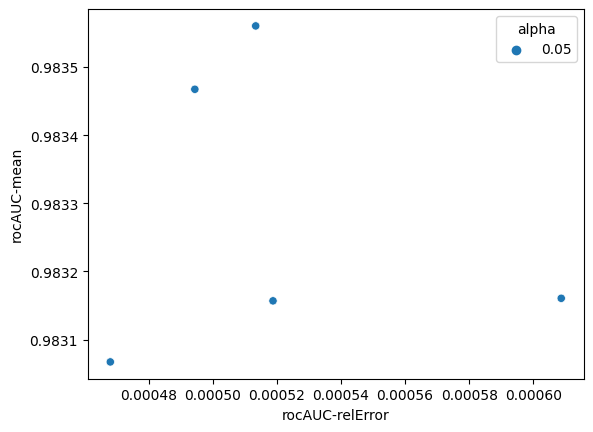

In [19]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="alpha", data=df2, palette=None, legendOutsideGraph=False, loglog=False)


In [50]:
df_q['weight'].unique()

array(['None'], dtype=object)

Can run for 1 fold only and run for all fold of those with score>.955


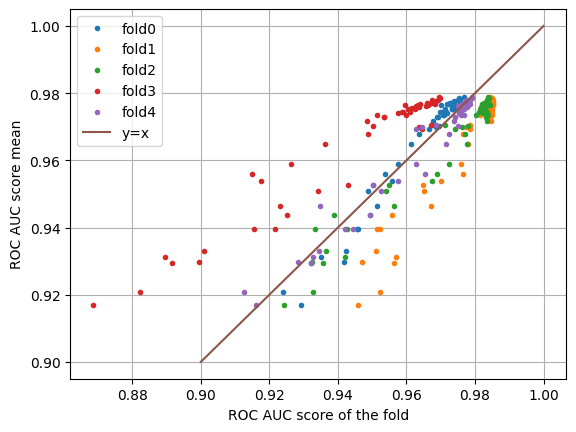

In [7]:
for i in range(5):
    plt.plot(df_q['rocAUC-fold{}'.format(i)],df_q['rocAUC-mean'],'.', label='fold{}'.format(i))
x = np.linspace(0.9, 1, 100)
plt.plot(x,x,'-', label='y=x')
plt.legend()
plt.xlabel('ROC AUC score of the fold')
plt.ylabel('ROC AUC score mean')
plt.grid()
print('Can run for 1 fold only and run for all fold of those with score>.955')

zoomed version


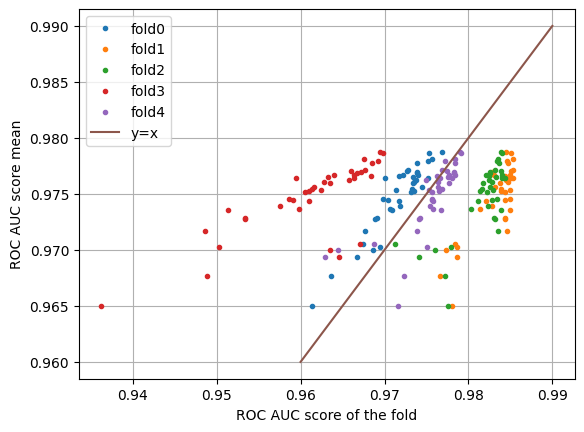

In [8]:
df3 = df_q[df_q['rocAUC-mean']>0.96]
for i in range(5):
    plt.plot(df3['rocAUC-fold{}'.format(i)],df3['rocAUC-mean'],'.', label='fold{}'.format(i))
x = np.linspace(0.96, 0.99, 100)
plt.plot(x,x,'-', label='y=x')
plt.legend()
plt.xlabel('ROC AUC score of the fold')
plt.ylabel('ROC AUC score mean')
plt.grid()
print('zoomed version')

In [16]:
#df_q

In [21]:
decreasingColorDarkness4={5000: "#F8D1CC",
1000: "#EEA8A1",
500: "#DF6261",
100: "#C92828"}

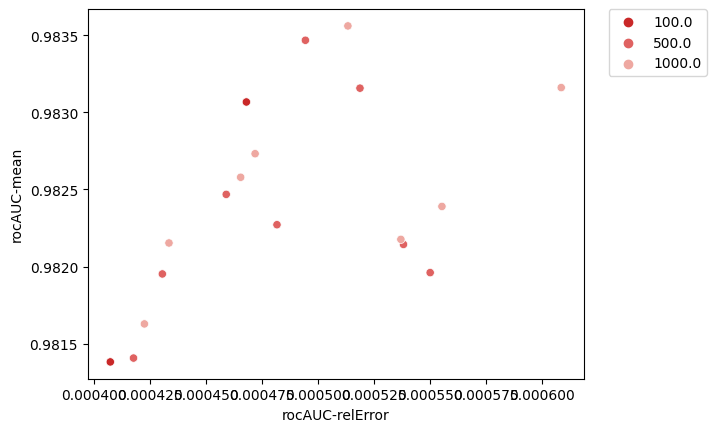

In [22]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="C_quant", data=df_q[(df_q['rocAUC-mean']>0.981)], palette=decreasingColorDarkness4, legendOutsideGraph=True, loglog=False)


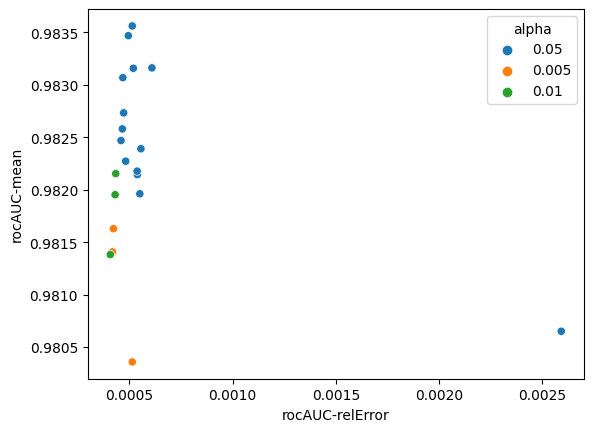

In [23]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="alpha", data=df_q[df_q['rocAUC-mean']>0.98], palette=None, legendOutsideGraph=False, loglog=False)


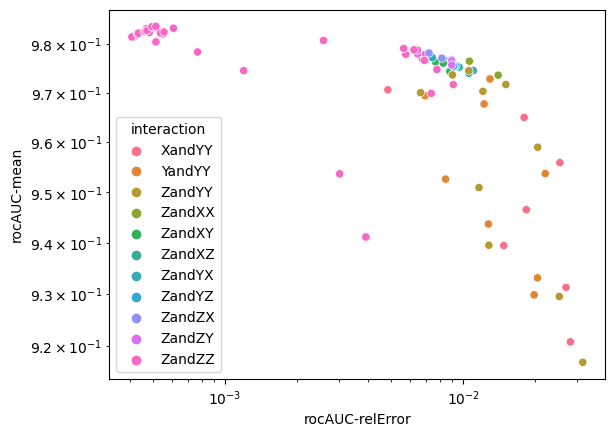

In [24]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="interaction", data=df_q, palette=None, legendOutsideGraph=False, loglog=True)


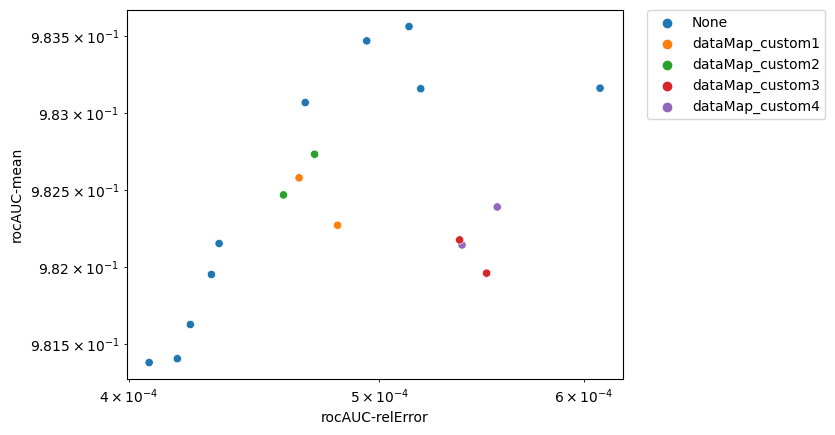

In [25]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="dataMapFunc", data=df_q[df_q['rocAUC-mean']>0.981], palette=None, legendOutsideGraph=True, loglog=True)


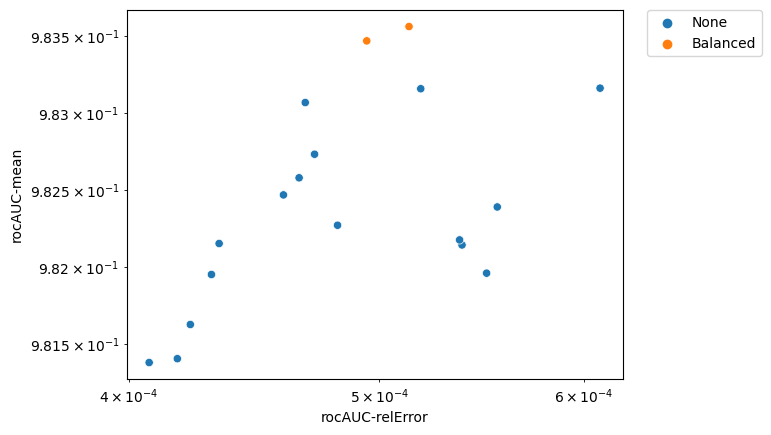

In [26]:
scatterplotColored(x="rocAUC-relError", y="rocAUC-mean", hue="weight", data=df_q[df_q['rocAUC-mean']>0.981], palette=None, legendOutsideGraph=True, loglog=True)


In [22]:
df_q[df_q['rocAUC-mean']>0.981].iloc[:,-16:].sort_values(by='rocAUC-mean', ascending=False)

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.05', '1000', 'None', 'ZandZZ', 'Balanced')",11260.115769,280.405735,0.983581,0.000581,0.954023,0.008922,0.93135,0.012223,0.000590,0.009352,0.013124,0.05,1000.0,None,ZandZZ,Balanced
"('0.05', '500', 'None', 'ZandZZ', 'Balanced')",11052.324125,336.090249,0.983467,0.000486,0.954386,0.007906,0.93188,0.010865,0.000494,0.008284,0.011659,0.05,500.0,None,ZandZZ,Balanced
"('0.05', '1000', 'None', 'ZandZZ', 'None')",12142.312427,785.643809,0.983161,0.000598,0.961537,0.005099,0.94092,0.007923,0.000609,0.005303,0.008420,0.05,1000.0,None,ZandZZ,None
"('0.05', '500', 'None', 'ZandZZ', 'None')",11862.971767,699.561432,0.983157,0.000510,0.960976,0.004812,0.94008,0.007473,0.000519,0.005008,0.007950,0.05,500.0,None,ZandZZ,None
"('0.05', '100', 'None', 'ZandZZ', 'None')",12267.144194,679.728307,0.983067,0.000460,0.961082,0.003688,0.94036,0.005451,0.000468,0.003838,0.005796,0.05,100.0,None,ZandZZ,None
"('0.05', '1000', 'dataMap_custom2', 'ZandZZ', 'None')",10979.805807,821.251789,0.982732,0.000464,0.960279,0.004147,0.93908,0.006381,0.000472,0.004318,0.006795,0.05,1000.0,dataMap_custom2,ZandZZ,None
"('0.05', '1000', 'dataMap_custom1', 'ZandZZ', 'None')",10772.631489,407.967599,0.982579,0.000457,0.960465,0.003775,0.93936,0.005730,0.000465,0.003931,0.006099,0.05,1000.0,dataMap_custom1,ZandZZ,None
"('0.05', '500', 'dataMap_custom2', 'ZandZZ', 'None')",11397.178875,1747.151806,0.982468,0.000451,0.959793,0.004199,0.93836,0.006464,0.000459,0.004375,0.006889,0.05,500.0,dataMap_custom2,ZandZZ,None
"('0.05', '1000', 'dataMap_custom4', 'ZandZZ', 'None')",11133.722436,1157.145286,0.982390,0.000546,0.959656,0.005345,0.93804,0.008512,0.000555,0.005570,0.009074,0.05,1000.0,dataMap_custom4,ZandZZ,None
"('0.05', '500', 'dataMap_custom1', 'ZandZZ', 'None')",11297.224612,516.745360,0.982271,0.000473,0.960090,0.004298,0.93880,0.006522,0.000482,0.004477,0.006947,0.05,500.0,dataMap_custom1,ZandZZ,None


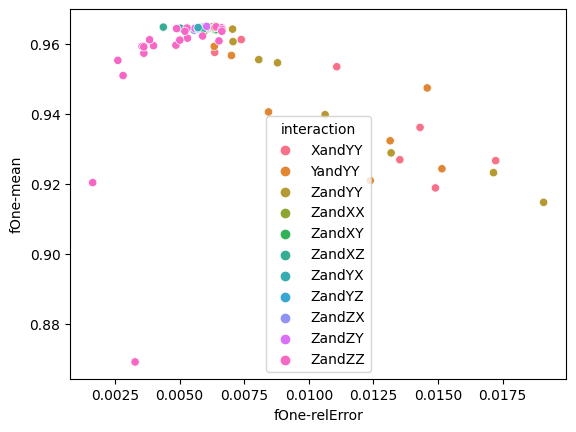

In [15]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="interaction", data=df_q, palette=None, legendOutsideGraph=False)


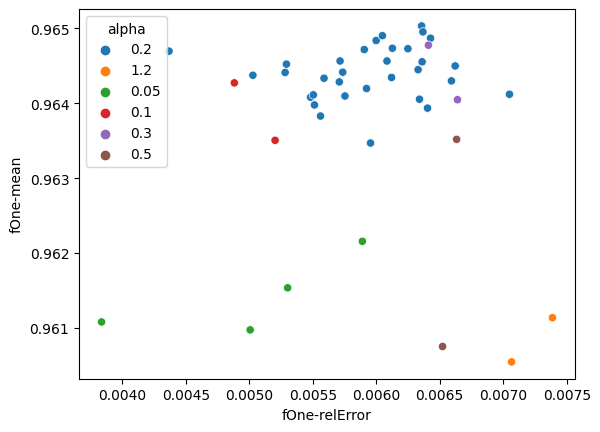

In [16]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="alpha", data=df_q[df_q['fOne-mean']>0.96], palette=None, legendOutsideGraph=False)


In [17]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="C_quant", data=df_q, palette=multicolors2, legendOutsideGraph=False, loglog=True)


NameError: name 'multicolors2' is not defined

In [18]:
scatterplotColored(x="fOne-relError", y="fOne-mean", hue="C_quant", data=df_q[df_q['fOne-mean']>0.962], palette=multicolors2, legendOutsideGraph=True)


NameError: name 'multicolors2' is not defined

In [19]:
df_q[df_q['fOne-mean']>0.965].iloc[:,-16:]

,TimeToRun-mean,TimeToRun-std,rocAUC-mean,rocAUC-std,fOne-mean,fOne-std,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.2', '1000', 'None', 'XandYY', 'None')",12493.164836,1842.483165,0.976934,0.006577,0.96503,0.006135,0.94612,0.009823,0.006732,0.006357,0.010382,0.2,1000.0,None,XandYY,None


In [40]:
col1 = 'rocAUC-mean'
col2 = 'alpha'
df_q[col1]. corr(df_q[col2].astype(float))

-0.8877248494028299

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.2', '10', 'None', 'XandYY', 'None')",11714.365900,13749.505623,11950.882698,10477.687533,13443.234402,0.969074,0.984408,0.983087,0.953327,0.974206,...,0.94468,0.008499,0.012958,0.005483,0.008997,0.2,10.0,None,XandYY,None
"('0.2', '10', 'None', 'YandYY', 'None')",11189.803967,15965.845028,14268.375483,11203.824275,10775.527762,0.968892,0.984407,0.983124,0.953393,0.974146,...,0.94472,0.008563,0.012952,0.005505,0.009064,0.2,10.0,None,YandYY,None
"('0.2', '10', 'None', 'ZandYY', 'None')",11333.197286,10539.270825,11831.352894,10583.428170,11271.694027,0.967729,0.984635,0.983490,0.948575,0.973844,...,0.94452,0.008529,0.015103,0.005514,0.009030,0.2,10.0,None,ZandYY,None
"('0.2', '1000', 'None', 'XandYY', 'None')",11534.562477,15451.152796,10526.478747,12621.688815,12331.941344,0.973838,0.982785,0.982626,0.967181,0.978238,...,0.94612,0.009823,0.006732,0.006357,0.010382,0.2,1000.0,None,XandYY,None
"('0.2', '1000', 'None', 'YandYY', 'None')",10357.303691,16959.732548,12613.580714,12077.621409,12112.549599,0.973837,0.982756,0.982621,0.966710,0.978234,...,0.94600,0.009836,0.006905,0.006368,0.010397,0.2,1000.0,None,YandYY,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('0.01', '100', 'None', 'ZandZZ', 'None')",11321.029065,10516.022979,12926.846882,12936.660831,11862.899564,0.981839,0.981360,0.980751,0.981560,0.981399,...,0.93748,0.004810,0.000407,0.003612,0.005130,0.01,100.0,None,ZandZZ,None
"('0.01', '500', 'None', 'ZandZZ', 'None')",10463.296613,11199.148067,10479.108503,11909.454450,10837.383744,0.982482,0.982125,0.981322,0.981959,0.981873,...,0.93780,0.005821,0.000430,0.003991,0.006207,0.01,500.0,None,ZandZZ,None
"('0.01', '1000', 'None', 'ZandZZ', 'None')",10974.783000,10349.188662,10390.549702,14342.259452,12197.996377,0.982718,0.982367,0.981588,0.982141,0.981951,...,0.93796,0.007282,0.000433,0.004857,0.007764,0.01,1000.0,None,ZandZZ,None
"('0.05', '100', 'None', 'ZandZZ', 'None')",12106.008571,12974.541893,12726.394765,12314.527472,11214.248267,0.983597,0.983528,0.982799,0.982806,0.982605,...,0.94036,0.005451,0.000468,0.003838,0.005796,0.05,100.0,None,ZandZZ,None


In [26]:
a = "Result from applying the SVC model to the test set stored as: output//result_Quant-alpha0p05-C1000-dataMapFuncdataMap_custom4-interactionZandZZ-weightNone-trainSize20000-testSize5000-foldIdx4.pkl"

In [27]:
a

'Result from applying the SVC model to the test set stored as: output//result_Quant-alpha0p05-C1000-dataMapFuncdataMap_custom4-interactionZandZZ-weightNone-trainSize20000-testSize5000-foldIdx4.pkl'

In [30]:
hypePars_splitted = a.strip().split("-")

In [32]:
if ('Quant' in hypePars_splitted[0]) and ('Class' not in hypePars_splitted[0]):
    alpha = hypePars_splitted[1].replace("alpha", "")
    if "p" in alpha:
        alpha = alpha.replace("p", ".")
    const_C = hypePars_splitted[2].replace("C", "")
    if "p" in const_C:
        const_C = const_C.replace("p", ".")
    dataMapFunc = hypePars_splitted[3].replace("dataMapFunc", "")
    interaction = hypePars_splitted[4].replace("interaction", "")
    weight = hypePars_splitted[5].replace("weight", "")
    trainSize = hypePars_splitted[6].replace("trainSize", "")
    testSize = hypePars_splitted[7].replace("testSize", "")
    foldIdx = hypePars_splitted[8].replace("foldIdx", "").replace(".pkl", "")

In [33]:
dataMapFunc

'dataMap_custom4'

In [34]:
singleQubitInt = ['X', 'Y', 'Z']
twoQubitInt = [first + second for first in singleQubitInt for second in singleQubitInt] # create this list: ['XX', 'XY', ...]
singleThenTwoQubitInt = [[a,b] for a in singleQubitInt for b in twoQubitInt]
list_interaction = [x for x in singleThenTwoQubitInt if x != ['Z', 'ZZ']]

In [36]:
len(list_interaction)

26

In [32]:
[x for x in singleThenTwoQubitInt if x != ['Z', 'ZZ']]

[['X', 'XX'],
 ['X', 'XY'],
 ['X', 'XZ'],
 ['X', 'YX'],
 ['X', 'YY'],
 ['X', 'YZ'],
 ['X', 'ZX'],
 ['X', 'ZY'],
 ['X', 'ZZ'],
 ['Y', 'XX'],
 ['Y', 'XY'],
 ['Y', 'XZ'],
 ['Y', 'YX'],
 ['Y', 'YY'],
 ['Y', 'YZ'],
 ['Y', 'ZX'],
 ['Y', 'ZY'],
 ['Y', 'ZZ'],
 ['Z', 'XX'],
 ['Z', 'XY'],
 ['Z', 'XZ'],
 ['Z', 'YX'],
 ['Z', 'YY'],
 ['Z', 'YZ'],
 ['Z', 'ZX'],
 ['Z', 'ZY']]

In [33]:
df2

,TimeToRun-fold0,TimeToRun-fold1,TimeToRun-fold2,TimeToRun-fold3,TimeToRun-fold4,rocAUC-fold0,rocAUC-fold1,rocAUC-fold2,rocAUC-fold3,rocAUC-fold4,...,accuracy-mean,accuracy-std,rocAUC-relError,fOne-relError,accuracy-relError,alpha,C_quant,dataMapFunc,interaction,weight
"('0.05', '1000', 'None', 'ZandZZ', 'None')",12166.964803,13090.877094,11899.950962,10988.611813,12565.157461,0.982869,0.984222,0.982861,0.983029,0.982822,...,0.94092,0.007923,0.000609,0.005303,0.008420,0.05,1000.0,None,ZandZZ,None
"('0.05', '100', 'None', 'ZandZZ', 'None')",12106.008571,12974.541893,12726.394765,12314.527472,11214.248267,0.983597,0.983528,0.982799,0.982806,0.982605,...,0.94036,0.005451,0.000468,0.003838,0.005796,0.05,100.0,None,ZandZZ,None
"('0.05', '500', 'None', 'ZandZZ', 'None')",12836.516048,12322.100216,11150.723307,11629.554657,11375.964608,0.983045,0.984054,0.982988,0.982900,0.982797,...,0.94008,0.007473,0.000519,0.005008,0.007950,0.05,500.0,None,ZandZZ,None
"('0.05', '500', 'None', 'ZandZZ', 'Balanced')",10465.135500,11153.500042,11317.822681,11130.983378,11194.179022,0.983737,0.984155,0.983202,0.982910,0.983332,...,0.93188,0.010865,0.000494,0.008284,0.011659,0.05,500.0,None,ZandZZ,Balanced
"('0.05', '1000', 'None', 'ZandZZ', 'Balanced')",10906.661903,11163.786365,11468.872906,11501.141902,13452.051352,0.983505,0.984419,0.983286,0.983116,0.983477,...,0.93152,0.010592,0.000513,0.008103,0.011371,0.05,1000.0,None,ZandZZ,Balanced
